In [1]:
# IMPORT STATEMENTS
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path.append("BoNE")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def getPDF(cfile):
    from matplotlib.backends.backend_pdf import PdfPages
    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Debashis Sahoo'
    d['Subject'] = "AD"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 6, 19)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

<a id="TOC"></a>
## Alzheimer's Disease Analysis
[Test](#test_1)

In [2]:
import bone
reload(bone)

class ADAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getPatel2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD8")
        atype = self.h.getSurvName('c tissue')
        ahash = {'Temporal_Cortex':1, 'Cerebellum':3,
                 'Frontal_Cortex':2, 'Entorhinal_Cortex':0}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c disease state')
        atypes = ['N', 'A', "AD"]
        ahash = {'AsymAD':1, 'AD':2, 'control':0}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
            atypes = ['N', "AD"]
            ahash = {'AD':1, 'control':0}
        self.initData(atype, atypes, ahash)
        return

    def getFriedman2017(self, tn=1, ta=0, tb=0):
        self.prepareData("AD3")
        atype = self.h.getSurvName('c diagnosis')
        atypes = ['N', "AD"]
        ahash = {'control':0, "Alzheimer's disease":1}
        self.initData(atype, atypes, ahash)
        return

    def getLiang2007(self, tn=1, ta=0, tb=0):
        self.prepareData("AD2")
        atype = self.h.getSurvName('c organ region')
        atype1 = self.h.getSurvName('c Organ Region')
        atype = [atype[k] if atype[k] != '' else atype1[k]
                        for k in range(len(atype))]
        ahash = {'Medial Temporal Gyrus\xa0':0, 'hippocampus\xa0':1,
                'Superior Frontal Gyrus\xa0':2, 'Primary Visual Cortex\xa0':3,
                'Posterior Singulate\xa0':4, 'Entorhinal Cortex\xa0':5,
                'Posterior Cingulate\xa0':6, 'Posterior cingulate\xa0':7}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c Disease State')
        atype1 = self.h.getSurvName('c disease state')
        atype = [atype[k] if atype[k] != '' else atype1[k]
                for k in range(len(atype))]
        atypes = ['N', "AD"]
        ahash = {'normal\xa0':0, "Alzheimer's Disease\xa0":1}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        if (tn == 3):
            ah = {4:1, 6:1, 7:1}
            atype = [atype[i] if tval[i] in ah
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return
    
    def getWang2016(self, tn=1, ta=0, tb=0):
        self.prepareData("AD9")
        atype = self.h.getSurvName('c brain region')
        ahash = {'Amygdala':0, 'Nucleus Accumbens':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c neuropathological category')
        atypes = ['N', "AD", 'pS', 'pB']
        ahash = {'definite AD':1, 'Possible AD':2, 'Normal':0, 'Probable AD':3}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        if (tn == 3):
            atypes = ['N', "AD"]
            ahash = {'definite AD':1, 'Normal':0}
        if (tn == 4):
            atypes = ['N', "AD"]
            ahash = {'definite AD':1, 'Normal':0}
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getWang2016II(self, tn=1, ta=0, tb=0):
        self.prepareData("AD10")
        atype = self.h.getSurvName('c brain region')
        ahash = {'Inferior Temporal Gyrus':0, 'Parahippocampal Gyrus':1,
                'Middle Temporal Gyrus':2, 'Occipital Visual Cortex':3,
                'Prefrontal Cortex':4, 'Hippocampus':5, 'Caudate Nucleus':6,
                'Frontal Pole':7, 'Precentral Gyrus':8,
                'Posterior Cingulate Cortex':9, 'Superior Temporal Gyrus':10,
                'Superior Parietal Lobule':11, 'Temporal Pole':12,
                'Anterior Cingulate':13, 'Inferior Frontal Gyrus':14,
                'Dorsolateral Prefrontal Cortex':15, 'Putamen':16}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c neuropathological category')
        atypes = ['N', "AD", 'pS', 'pB']
        ahash = {'Possible AD':2, 'definite AD':1, 'Normal':0, 'Probable AD':3}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        if (tn == 3):
            atypes = ['N', "AD"]
            ahash = {'definite AD':1, 'Normal':0}
        if (tn == 4):
            atypes = ['N', "AD"]
            ahash = {'definite AD':1, 'Normal':0}
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getBerchtold2014(self, tn=1, ta=0, tb=0):
        self.prepareData("AD11")
        atype = self.h.getSurvName('c brain region')
        ahash = {'entorhinal cortex':0, 'postcentral gyrus':1, 'hippocampus':2,
                'superior frontal gyrus':3, 'post-central gyrus':4}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c AD specific')
        atypes = ['N', "AD"]
        ahash = {'0':0, '1':1}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getMarttinen2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD12")
        atype = self.h.getSurvName('c braak stage')
        atypes = ['N', "AD"]
        ahash = {'3':1, '5':1, '2':1, '6':1, '1':1, '0':0, '4':1}
        if (tn == 2):
            ahash = {'3':1, '5':1, '2':0, '6':1, '1':0, '0':0, '4':1}
        self.initData(atype, atypes, ahash)
        return

    def getWebster2009(self, tn=1, ta=0, tb=0):
        self.prepareData("AD14")
        atype = self.h.getSurvName('c src1')
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['N', "AD"]
        ahash = { "Alzheimer's":1, 'neuropathologically':0}
        self.initData(atype, atypes, ahash)
        return

    def getLu2014(self, tn=1, ta=0, tb=0):
        self.prepareData("AD16")
        atype = self.h.getSurvName('c age')
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['N', "AD"]
        ahash = {}
        for k in atype[2:]:
            if float(k) < 80:
                ahash[k] = 0
            else:
                ahash[k] = 1
        self.initData(atype, atypes, ahash)
        return

    def getLu2004(self, tn=1, ta=0, tb=0):
        self.prepareData("AD18")
        atype = self.h.getSurvName('c Title')
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['N', "AD"]
        ahash = {}
        for k in atype[2:]:
            if k == 'another':
                continue
            if float(k) < 80:
                ahash[k] = 0
            else:
                ahash[k] = 1
        self.initData(atype, atypes, ahash)
        return

    def getBerchtold2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD20")
        atype = self.h.getSurvName('c physical activity tier')
        atypes = ['H', 'M', 'L']
        ahash = {'moderate activity':1, 'high activity':0, 'low activity':2}
        if tn == 2:
            atypes = ['H', 'L']
            ahash = {'high activity':0, 'low activity':1}
        self.initData(atype, atypes, ahash)
        return

    def getSrinivasan2020(self, tn=1, ta=0, tb=0):
        self.prepareData("AD21")
        atype = self.h.getSurvName('c diagnosis')
        atypes = ['N', 'AD']
        ahash = {"Alzheimer's disease":1, 'control':0}
        self.initData(atype, atypes, ahash)
        return

    def getSrinivasan2020II(self, tn=1, ta=0, tb=0):
        self.prepareData("AD22")
        atype = self.h.getSurvName('c cell type')
        ahash = {'myeloid':0, 'astrocyte':1, 'neuron':2, 'endothelial':3}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c diagnosis')
        atypes = ['N', 'AD']
        ahash = {'Control':0, 'AD':1}
        if (tn == 2):
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getFriedman2018(self, tn=1, ta=0, tb=0):
        self.prepareData("AD23")
        atype = self.h.getSurvName('c diagnosis')
        atypes = ['N', 'AD']
        ahash = {"Alzheimer's disease":1, 'control':0}
        self.initData(atype, atypes, ahash)
        return

    def getRodriguez2021(self, tn=1, ta=0, tb=0):
        self.prepareData("AD24")
        atype = self.h.getSurvName('c stimulant')
        ahash = {'':0, 'dsRNA + lipofectamine':3, 'lipopolysaccharide':4,
                  'dsRNA':1, 'lipofectamine':2}
        tval = [ahash[i] if i in ahash else None for i in atype]
        dval = self.h.getSurvName('c drug_treatment')
        atype = self.h.getSurvName('c drug_concentration_um')
        atypes = ['C', '0.3', '1', '3', '10']
        ahash = {'':0, '0.3':1, '1':2, '3':3, '10':4}
        if (tn == 2):
            atype = ['' if (dval[i] == '' or dval[i] == 'dmso')
                     else atype[i] for i in range(len(atype))]            
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
            atype = [atype[i] if (dval[i] == '' or dval[i] == 'dmso'
                                 or dval[i] == tb)
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getNiculescu2020(self, tn=1, ta=0, tb=0):
        self.prepareData("AD25")
        atype = self.h.getSurvName('c neuropsych test results')
        atypes = ['N', 'MCI', 'AD', 'O']
        ahash = {'':0, '3 = other cognitive disorder but not MCI or ADRD':3,
                 '1 = MCI':1, '2 = ADRD':2}
        if (tn == 2):
            atypes = ['N', 'AD']
            ahash = {'':0, '2 = ADRD':1}
        if (tn == 3):
            atypes = ['N', 'MCI']
            ahash = {'':0, '1 = MCI':1}
        self.initData(atype, atypes, ahash)
        return

    def getSood2015I(self, tn=1, ta=0, tb=0):
        self.prepareData("AD26")
        atype = self.h.getSurvName('c status')
        atypes = ['CTL', 'MCI', 'AD']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getSood2015II(self, tn=1, ta=0, tb=0):
        self.prepareData("AD27")
        atype = self.h.getSurvName('c status')
        atypes = ['CTL', 'MCI', 'AD', 'MCL', 'O', 'B', 'CA']
        ahash = {'MCI to CTL':3, 'OTHER':4, 'borderline MCI':5, 'CTL to AD':6}
        self.initData(atype, atypes, ahash)
        return

    def getMiyashita2014(self, tn=1, ta=0, tb=0):
        self.prepareData("AD28")
        atype = self.h.getSurvName('c braak nft stage')
        atypes = ['0', 'I-II', 'III-IV', 'V-VI']
        ahash = {}
        if (tn == 2):
            atypes = ['0', 'V-VI']
        self.initData(atype, atypes, ahash)
        return

    def getSamsudin2016(self, tn=1, ta=0, tb=0):
        self.prepareData("AD29")
        atype = self.h.getSurvName('c diagnosis')
        atypes = ['C', 'AD']
        ahash = {"Probable Alzheimer's Disease":1, 'Non-demented control':0}
        self.initData(atype, atypes, ahash)
        return

    def getMcKay2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD30")
        atype = self.h.getSurvName('c patient diagnosis')
        atypes = ['C', 'AD', 'VD']
        ahash = {'Control':0, 'Vascular dementia':2, "Alzheimer's disease":1}
        if (tn == 2):
            atypes = ['C', 'AD']
            ahash = {'Control':0, "Alzheimer's disease":1}
        self.initData(atype, atypes, ahash)
        return

    def getLow2021(self, tn=1, ta=0, tb=0):
        self.prepareData("AD31")
        atype = self.h.getSurvName('c desc')
        atypes = ['CTRL', 'DLB', 'AD', 'PDD']
        ahash = {}
        if (tn == 2):
            atypes = ['CTRL', 'AD']
        self.initData(atype, atypes, ahash)
        return

    def getDong2013(self, tn=1, ta=0, tb=0):
        self.prepareData("AD32")
        atype = self.h.getSurvName('c src1')
        atype = [str(k).split(" ")[2] if len(str(k).split(" ")) > 2 else k
                for k in atype]
        atypes = ['E', 'O']
        ahash = {'endogenous':0, 'overexpressed':1}
        self.initData(atype, atypes, ahash)
        return

    def getHurley2012(self, tn=1, ta=0, tb=0):
        self.prepareData("AD33")
        atype = self.h.getSurvName('c Title')
        atypes = ['C', 'KD']
        ahash = {'TCEB1_KD':0, 'ARHGAP1_KD':0, 'CDC42EP1_KD':0, 'GPR4_KD':1}
        self.initData(atype, atypes, ahash)
        return

    def getPatella2020(self, tn=1, ta=0, tb=0):
        self.prepareData("AD34")
        atype = self.h.getSurvName('c treatment')
        atypes = ['C', 'EBM2', 'iVWF', 'M199', 'TNFa']
        ahash = {'nucleofected with si-VWF':2,
                'untreated, grown in EBM2_':1,
                 'mock nucleofected':0,
                 'untreated, grown in M199_':3,
                 'treated with 50ng/ml TNFa for 3h, grown in M199_':4}
        self.initData(atype, atypes, ahash)
        return

    def getAvrampou2019(self, tn=1, ta=0, tb=0):
        self.prepareData("AD35")
        atype = self.h.getSurvName('c genotype')
        atypes = ['WT', 'RGS4 KO']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getOlmosSerrano2016(self, tn = 1, ta = 0):
        self.prepareData("DE49", "/Users/mgosztyl/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c region');
        ahash = {'DFC':0, 'S1C':1, 'OFC':2, 'V1C':3, 'ITC':4, 'MFC':5,
                 'CBC':6, 'VFC':7, 'HIP':8, 'FC':9, 'STC':10, 'IPC':11}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c disease status');
        atypes = ['N', 'DS']
        ahash = {'CTL':0, 'DS':1}
        if tn == 2:
            atype = self.h.getSurvName('c disease and tissue');
            atypes = ['N', 'DS']
            ahash = {'CTL ITC':0, 'CTL STC':0, 'CTL HIP':0,
                     'DS ITC':1, 'DS STC':1, 'DS HIP':1}
        if tn == 3:
            atype = self.h.getSurvName('c disease and tissue');
            atypes = ['N', 'DS']
            ahash = {'CTL V1C':0, 'DS V1C':1,}
        if tn == 4:
            atype = [atype[i] if tval[i] == ta
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getWilliams2009(self, tn = 1):
        self.prepareData("DE51", "/Users/mgosztyl/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Disease State');
        atypes = ['N', 'MCI']
        ahash = {'Control':0, 'MCI':1}
        self.initData(atype, atypes, ahash)

    def getAxol2021(self, tn = 1):
        self.prepareData("AD36")
        atype = self.h.getSurvName('c Cell Type');
        ahash = {'NSC':0, 'Str':1, 'iPSCs':2}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c Disease State');
        atypes = ['C', 'AD']
        ahash = {}
        if (tn == 2):
            atype = [atype[i] if tval[i] == 0
                     else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        return

    def getDunckley2006(self, tn = 1):
        self.prepareData("AD44")
        atype = self.h.getSurvName('c brain, Entorhinal Cortex')
        atype = [re.sub(".* ", "", str(k)) for k in atype]
        atypes = ['C', 'AD']
        ahash = {'tangle_e1_le1':1, 'normal_e1_le1':0}
        self.initData(atype, atypes, ahash)
        return

    def getBlalock2011(self, tn = 1):
        self.prepareData("AD45")
        atype = self.h.getSurvName('c disease status')
        atypes = ['C', 'I', 'M', 'S']
        ahash = {'Moderate':2, 'Severe':3, 'Incipient':1, 'Control':0}
        if tn == 2:
            atypes = ['C', 'AD']
            ahash = {'Moderate':1, 'Severe':1, 'Incipient':1, 'Control':0}
        self.initData(atype, atypes, ahash)
        return

    def getQian2020(self, tn = 1):
        self.prepareData("AD47")
        atype = self.h.getSurvName('c genetic manipulation')
        atypes = ['C', 'shPTB']
        ahash = {'shRNA against PTB':1, 'Mock':0}
        self.initData(atype, atypes, ahash)
        return

def getADGeneSet(index=0):
    wt1, l1 = [-3, 1], [bone.getEntries("results/list-1.txt", 0), \
                        bone.getEntries("results/list-2.txt", 0)]    
    if index == 1 or index == 'PMID29656362-Kim':
        up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
        down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
        wt1, l1 = [1, -1], [up, down]
    if index == 2 or index == 'PMID25710473-IL15/RA':
        wt1, l1 = [1], [['IL15', 'IL15RA']]
    if index == 3 or index == 'PMID33339153-IL6/R':
        wt1, l1 = [1], [['IL6', 'IL6R']]
    if index == 4 or index == 'PMID34410590-GWAS':
        wt1, l1 = [-1], [["PCDH11Y" , "PCDH11X", "TPTE2", "LOC107985902", "MUC16" , "LINC01621"]]
    if index == 5 or index == 'PMID33057964-Sanfilippo':
        wt1, l1 = [-1], [ ["GNG13", "PCP2", "GPSM4", "PCP4", "PEP19", "CBLN", "CBLN3"]]
    if index == 6 or index == 'PMID34234395-Madar':
        wt1, l1 = [1], [["CNPY3", "GPR84", "HIST1H2AB", "HIST1H2AE", "IFNAR1", "LMO3",
                     "MYO18A", "N4BP2L1", "PML", "SLC4A4", "ST8SIA4", "TLE1" , "N4BP2L1"] ]
    if index == 7 or index == 'PMID34384464-Bai':
        up = bone.getEntries("database/PMID34384464-Bai-up.txt", 0)
        down = bone.getEntries("database/PMID34384464-Bai-down.txt", 0)
        wt1, l1 = [1, -1], [up, down]
    if index == 8 or index == 'PMID34194312-Lasso-Yu':
        lassof="database/PMID34194312-Lasso-Yu.txt"
        lasso = bone.getEntries(lassof, 0)
        ddeg_yuf="database/PMID34194312-DEG-Yu-down.txt"
        udeg_yuf="database/PMID34194312-DEG-Yu-up.txt"
        ddeg_yu = bone.getEntries(ddeg_yuf, 0)
        udeg_yu = bone.getEntries(udeg_yuf, 0)
        wt1, l1 = [-1, 1], [set(lasso).intersection(ddeg_yu), set(lasso).intersection(udeg_yu)]
    if index == 9 or index == 'PMID34194312-DEG-Yu':
        ddeg_yuf="database/PMID34194312-DEG-Yu-down.txt"
        udeg_yuf="database/PMID34194312-DEG-Yu-up.txt"
        ddeg_yu = bone.getEntries(ddeg_yuf, 0)
        udeg_yu = bone.getEntries(udeg_yuf, 0)
        wt1, l1 = [1, -1], [udeg_yu, ddeg_yu]
    if index == 10 or index == 'PMID34194312-HUB-Yu':
        dhup_yuf="database/PMID34194312-HUB-Yu-down.txt"
        uhub_yuf="database/PMID34194312-HUB-Yu-down.txt"
        dhup_yu = bone.getEntries(dhup_yuf, 0)
        uhub_yu = bone.getEntries(uhub_yuf, 0)
        wt1, l1 = [1, -1], [uhub_yu, dhup_yu]
    if index == 11 or index == 'PMID32699331-Zakeri': # Blood based
        final_list = ["MBOAT1", "ARMC7", "RABL2B", "HNRNPUL1", "LAMTOR1",
                      "PLAGL2", "CREBRF", "LCOR",  "MRI1"]
        wt1, l1 = [1], [ final_list]
    if index == 12 or index == 'PMID32699331-Zakeri-deg': # Blood based
        deg_z = bone.getEntries("database/PMID32699331-Zakeri-deg.txt", 0)
        wt1, l1 = [1], [ deg_z]
    if index == 13 or index == 's41048-019-0086-2-Wu':
        up = bone.readList("database/10.1007_s41048-019-0086-2-Wu-up.txt")
        down = bone.readList("database/10.1007_s41048-019-0086-2-Wu-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 14 or index == 'PMID31984950-Lui':
        up_hub = [ "ENO2", "NFKBIA",  "ACACB"]
        down_hub =  [ "CCT2", "CALM2", "ATP5B", "MDH1", "PPP2CA", "PSMD14", "ATP5C1",
                     "LDHA", "CCT4", "COPS5", "TXN", "PGK1", "NDUFA4", "ACTR10", "IMMT",
                     "ATP5F1", "NDUFAB1", "CUL1", "PSMB7", "SKP1", "MTHFD1", "TUBA4A",
                     "PSMA5", "TUBA1B", "TUBA1C", "HINT1", "NME1", "PSMA1", "TUBB4B"]
        wt1, l1 = [1, -1], [up_hub, down_hub]
    if index == 15 or index == 'PMID32255787-Klein':
        up = bone.readList("database/PMID32255787-Klein-up.txt")
        down = bone.readList("database/PMID32255787-Klein-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 16 or index == 'PMID29802388-S3m109':
        ff= bone.getEntries("database/PMID29802388-S3m109.txt", 0)
        wt1, l1 = [1], [ ff]
    if index == 17 or index == 'PMID27799057-S7':
        up = bone.readList("database/PMID27799057-S7-up.txt")
        down = bone.readList("database/PMID27799057-S7-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 18 or index == 'PMID27989508-S8M14':
        ff= bone.getEntries("database/PMID27989508-S8M14.txt" , 0)
        wt1, l1 = [1], [ ff]
    if index == 19 or index == 'PMID29110684-S5D2':
        up = bone.readList("database/PMID29110684-S5D2-up.txt")
        down = bone.readList("database/PMID29110684-S5D2-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 20 or index == 'PMID29107053-S3':
        up = bone.readList("database/PMID29107053-S3-up.txt")
        down = bone.readList("database/PMID29107053-S3-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 21 or index == 'PMID29358399-S02':
        up = bone.readList("database/PMID29358399-S02-up.txt")
        down = bone.readList("database/PMID29358399-S02-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 22 or index == 'PMID30136084-S1':
        up = bone.readList("database/PMID30136084-S1-up.txt")
        down = bone.readList("database/PMID30136084-S1-down.txt")
        wt1, l1 = [1, -1], [up, down]
    if index == 23 or index == 'PMID29598827-S8a':
        ff= bone.getEntries("database/PMID29598827-S8a.txt" , 0)
        wt1, l1 = [1], [ ff]
    if index == 24 or index == 'PMID30297968-S8':
        up = bone.readList("database/PMID30297968-S8-up.txt")
        down = bone.readList("database/PMID30297968-S8-down.txt")
        wt1, l1 = [1, -1], [up, down]
    return wt1, l1

def ADComparison(ana, desc=''):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []

    wt1, l1 = [-3, 1], [bone.getEntries("results/list-1.txt", 0), \
                        bone.getEntries("results/list-2.txt", 0)]    
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','BONE', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
    down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29656362-Kim', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
        
    wt1, l1 = [1], [['IL15', 'IL15RA']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID25710473-IL15/RA', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [1], [['IL6', 'IL6R']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID33339153-IL6/R', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
       
    wt1, l1 = [-1], [["PCDH11Y" , "PCDH11X", "TPTE2", "LOC107985902", "MUC16" , "LINC01621"]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34410590-GWAS', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]   

    wt1, l1 = [-1], [ ["GNG13", "PCP2", "GPSM4", "PCP4", "PEP19", "CBLN", "CBLN3"]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID33057964-Sanfilippo', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
  
    wt1, l1 = [1], [["CNPY3", "GPR84", "HIST1H2AB", "HIST1H2AE", "IFNAR1", "LMO3",
                     "MYO18A", "N4BP2L1", "PML", "SLC4A4", "ST8SIA4", "TLE1" , "N4BP2L1"] ]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34234395-Madar', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up = bone.getEntries("database/PMID34384464-Bai-up.txt", 0)
    down = bone.getEntries("database/PMID34384464-Bai-down.txt", 0)
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34384464-Bai', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    lassof="database/PMID34194312-Lasso-Yu.txt"
    ddeg_yuf="database/PMID34194312-DEG-Yu-down.txt"
    dhup_yuf="database/PMID34194312-HUB-Yu-down.txt"
    udeg_yuf="database/PMID34194312-DEG-Yu-up.txt"
    uhub_yuf="database/PMID34194312-HUB-Yu-down.txt"
    lasso = bone.getEntries(lassof, 0)
    ddeg_yu = bone.getEntries(ddeg_yuf, 0)
    udeg_yu = bone.getEntries(udeg_yuf, 0)
    wt1, l1 = [-1, 1], [set(lasso).intersection(ddeg_yu), set(lasso).intersection(udeg_yu)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34194312-Lasso-Yu', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    ddeg_yu = bone.getEntries(ddeg_yuf, 0)
    udeg_yu = bone.getEntries(udeg_yuf, 0)
    wt1, l1 = [1, -1], [udeg_yu, ddeg_yu]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34194312-DEG-Yu', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    dhup_yu = bone.getEntries(dhup_yuf, 0)
    uhub_yu = bone.getEntries(uhub_yuf, 0)
    wt1, l1 = [1, -1], [uhub_yu, dhup_yu]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID34194312-HUB-Yu', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    final_list = ["MBOAT1", "ARMC7", "RABL2B", "HNRNPUL1", "LAMTOR1",
                  "PLAGL2", "CREBRF", "LCOR",  "MRI1"]
    wt1, l1 = [1], [ final_list]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID32699331-Zakeri', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    deg_z = bone.getEntries("database/PMID32699331-Zakeri-deg.txt", 0)
    wt1, l1 = [1], [ deg_z]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID32699331-Zakeri-deg', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up = bone.readList("database/10.1007_s41048-019-0086-2-Wu-up.txt")
    down = bone.readList("database/10.1007_s41048-019-0086-2-Wu-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','s41048-019-0086-2-Wu', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up_hub = [ "ENO2", "NFKBIA",  "ACACB"]
    down_hub =  [ "CCT2", "CALM2", "ATP5B", "MDH1", "PPP2CA", "PSMD14", "ATP5C1",
                 "LDHA", "CCT4", "COPS5", "TXN", "PGK1", "NDUFA4", "ACTR10", "IMMT",
                 "ATP5F1", "NDUFAB1", "CUL1", "PSMB7", "SKP1", "MTHFD1", "TUBA4A",
                 "PSMA5", "TUBA1B", "TUBA1C", "HINT1", "NME1", "PSMA1", "TUBB4B"]
    wt1, l1 = [1, -1], [up_hub, down_hub]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID31984950-Lui', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up = bone.readList("database/PMID32255787-Klein-up.txt")
    down = bone.readList("database/PMID32255787-Klein-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID32255787-Klein', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
  
    ff= bone.getEntries("database/PMID29802388-S3m109.txt", 0)
    wt1, l1 = [1], [ ff]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29802388-S3m109', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    up = bone.readList("database/PMID27799057-S7-up.txt")
    down = bone.readList("database/PMID27799057-S7-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID27799057-S7', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    ff= bone.getEntries("database/PMID27989508-S8M14.txt" , 0)
    wt1, l1 = [1], [ ff]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID27989508-S8M14', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    up = bone.readList("database/PMID29110684-S5D2-up.txt")
    down = bone.readList("database/PMID29110684-S5D2-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29110684-S5D2', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    up = bone.readList("database/PMID29107053-S3-up.txt")
    down = bone.readList("database/PMID29107053-S3-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29107053-S3', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    up = bone.readList("database/PMID29358399-S02-up.txt")
    down = bone.readList("database/PMID29358399-S02-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29358399-S02', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    up = bone.readList("database/PMID30136084-S1-up.txt")
    down = bone.readList("database/PMID30136084-S1-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID30136084-S1', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    ff= bone.getEntries("database/PMID29598827-S8a.txt" , 0)
    wt1, l1 = [1], [ ff]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID29598827-S8a', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    up = bone.readList("database/PMID30297968-S8-up.txt")
    down = bone.readList("database/PMID30297968-S8-down.txt")
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','PMID30297968-S8', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

def getDiff(ana, l1, o1, o2):
    res = []
    for ll in l1:
        for gn in ll:
            for id1 in ana.h.getIDs(gn):
                e = ana.h.getExprData(id1)
                v1 = [float(e[i]) for i in o1]
                v2 = [float(e[i]) for i in o2]
                from scipy.stats import ttest_ind
                t, p = ttest_ind(v1,v2, equal_var=False)
                m1 = np.mean(v1)
                m2 = np.mean(v2)
                res += [[id1, ana.h.getSimpleName(id1), t, p, m1 - m2]]
    df = pd.DataFrame(res, columns=['ID', 'Name', 'T', 'P', 'Diff'])
    return df
def DP1(dfs): # VERTICAL

    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = [(i - 0.5) if i !=200  else 200  for i in df['ROC-AUC']]      #df['ROC-AUC'] - 0.5 
    df['Ra'] = [abs(i)+ 0.5  if i<1  else 0  for i in df['R'] ]     # abs(df['R']) + 0.5 
    df['Ra1'] = [abs(i)+ 0.5  if i<1  else 0.51 if i==0 else 0.48  for i in df['R'] ] 
    
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    #['Up' if i > 0 else 'Down' if i!=0 else 'NP' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra1']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.49, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.2f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
#             ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
#                     horizontalalignment='right', size='small', color='0.8',
#                     verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
#     labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax,fig

<a id="bone"></a>
## BoNE analysis
[Test](#test_1)

Qian 2020 astrocytes to neuron (n = 12)
GSE142250 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD47
12 [4, 8] GSE142250 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD47 AD47
[732, 789]


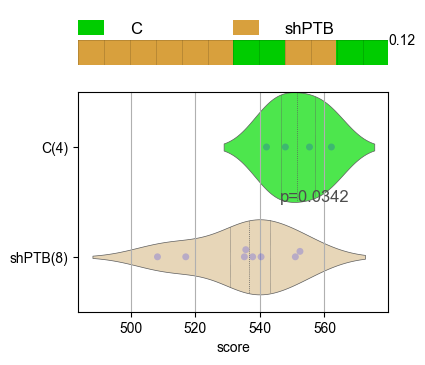

In [5]:
up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
wt1, l1 = [1, -1], [up, down]
ana = ADAnalysis()
#ana.getPatel2019(2, 3)
ana.convertMm(l1, [])
l1 = ana.gene_groups
ana.getQian2020()
#ana.getFriedman2017()
fig = bone.processData(ana, l1, wt1, None, 1)

In [174]:
import bone
reload(bone)
nodes, edges = bone.BIGraph.readEqGraph("results/ad-net-1-res.txt")
df = bone.BIGraph.pruneEqGraph(edges)
df.to_csv("results/ad-net-1-eq.txt", sep="\t", header=False, index=False)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df)
bone.BIGraph.saveClusters("results/ad-net-1-cls.txt", cls)
cfile = "results/ad-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("results/ad-net-1-eq-g.txt", sep="\t", header=False, index=False)

5227910 edges Processed
[0.4850995073520723, 8336.054627180658, -0.014900492647927699, 0.9850995073520723]0292 10292 10292 10292 10292 10292 10292 10292 10292 10292 1029210292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 1029210292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 1029210292 1029210292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 1029210292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292 10292


In [183]:
df = pd.read_csv("results/ad-net-1-eq.txt", sep="\t", header=None)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df, 0.7)
bone.BIGraph.saveClusters("results/ad-net-1-cls.txt", cls)

[0.4850995073520723, 8336.054627180658, -0.014900492647927699, 0.9850995073520723]


In [ ]:
cls = bone.BIGraph.readClusters("results/ad-net-1-cls.txt")
cfile = "results/ad-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("results/ad-net-1-eq-g.txt", sep="\t", header=False, index=False)

In [16]:
ana = ADAnalysis()
ana.getFriedman2017()
ofh = open("results/ad-net-1-cls-n.txt", "w")
for k in sorted(cls, key=lambda x: cls[x][0], reverse=True):
    l1 = ["(%s,%s)" % (k, ana.h.getSimpleName(k)), cls[k][0]] + \
       ["(%s,%s)" % (i, ana.h.getSimpleName(i))for i in cls[k][1]]
    l1 = [str(k) for k in l1]
    ofh.write("\t".join(l1) + "\n")
ofh.close()

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3


In [10]:
ana.h.getSimpleName('9705')

'ST18'

In [13]:
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("results/ad-net-2")
ana = ADAnalysis()
ana.getFriedman2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = bone.BIGraph.getBINGraph(ana, edges, clusters, dr)
G.add_edge('9705', '79153', rel='4', color='red')
G.add_edge('9705', '3055', rel='4', color='red')
bone.BIGraph.writeGML(G, "results/ad-net-2.gml")
bone.BIGraph.visualizeNetwork(G)

1116 Processed
Processing edges...
96542 edges processed
Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
2720 1.8849051819433562 ['84316', '100616314']
195 2.681898377364649 ['6863', '114824']
157 1.9818977872271897 ['3992', '9988']
28 2.392510440437215 ['677822', '9607']
18 3.416626433863201 ['677822', '9607']
14 3.4698806458948805 ['677822', '9607']
10 5.697559127089094 ['64850', '3992']
10 2.3929288956813406 ['7139', '134548']
9 2.09875470760462 ['9988', '677822']
8 2.51466728467472 ['84316', '2166']
['9705', '101409257', '3488']
['84316', '4059', '6662', '9988', '64850', '101409257', '3488', '9705']
['100616314', '84316', '4059', '6662', '9988', '64850', '101409257', '3488', '9705']
['3055', '7852', '9473', '89790', '2162']
['6863', '693213', '5122']
['114824', '3623']
['3992', '64850', '101409257', '3488', '9705']
['9988', '64850', '1014092

In [155]:
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("results/ad-net-2")
ana = ADAnalysis()
ana.getFriedman2017()
df = pd.read_csv(ana.h.rdataset.getVInfo(), sep="\t")
c1 = 'ProbeID'
df = df[df[c1] != c1]
dr = pd.to_numeric(df['97.5%']) - pd.to_numeric(df['2.5%'])
ids = df[c1]
dr.index = [str(k) for k in ids]
G = bone.BIGraph.getBINGraphGML(ana, edges, clusters, dr)
bone.BIGraph.writeGML(G, "results/ad-net-2.gml")

1116 Processed
Processing edges...
96542 edges processed
Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
2720 1.884905181943356 ['84316', '100616314']
195 2.6818983773646488 ['6863', '114824']
157 1.9818977872271897 ['3992', '9988']
28 2.392510440437215 ['677822', '9607']
18 3.4166264338632 ['677822', '9607']
14 3.4698806458948805 ['677822', '9607']
10 5.697559127089094 ['64850', '3992']
10 2.3929288956813397 ['7139', '134548']
9 2.09875470760462 ['9988', '677822']
8 2.51466728467472 ['84316', '2166']
['9705', '1848', '1524', '8082', '100302182']
['84316', '871', '629', '2064', '716', '100505702', '5788', '1524', '8082', '100302182']
['100616314', '84316', '871', '629', '2064', '716', '100505702', '5788', '1524', '8082', '100302182']
['3055', '4069']
['6863', '693213', '5122']
['114824', '793', '693213', '5122']
['3992', '677822', '100302182']
[

In [156]:
import networkx as nx
G = nx.read_gml("results/ad-net-2.gml")
G.add_edge('9705', '79153', rel='4',
           graphics={'width': 1.0, 'fill': '#ff0000', 'type': 'line',
                     'source_arrow': 0, 'target_arrow': 0})
G.add_edge('9705', '3055', rel='4',
           graphics={'width': 1.0, 'fill': '#ff0000', 'type': 'line',
                     'source_arrow': 0, 'target_arrow': 0})
for k in G:
    G.nodes[k]['graphics']['w'] = G.nodes[k]['graphics']['w'] * 5
    G.nodes[k]['graphics']['h'] = G.nodes[k]['graphics']['h'] * 5
bone.BIGraph.writeGML(G, "results/ad-net-2.gml")

In [8]:
ana = ADAnalysis()
ana.getFriedman2017()
res = []
index = 0
for k in G:
    l1 = [clusters[k]]
    wt1 = [1]
    print(index, k, ana.h.getSimpleName(k))
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    index +=1

actual = [1 if ana.aval[i] >= 1 else 0 for i in ana.i1]
data_list = { 'y': actual }
res2 = []
for i in range(len(G)):
    id1 = 'c' + str(i)
    c = [res[i][0][j] for j in ana.i1]
    data_list[id1] = c
    res2 += [id1]
df1 = pd.DataFrame(data_list)
df2 = bone.printOLS('y ~ ' + '+'.join(res2) , df1)

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
0 9705 ST18
[183]
ROC-AUC 0.60
[-47.79793298564119, 192.2813995061942, -48.29793298564119, -47.29793298564119]
14.804871228958143 -47.79793298564119
1 84316 NAA38
[53]
ROC-AUC 0.41
[-13.843485408390483, 208.55498371697539, -14.343485408390483, -13.343485408390483]
4.747454094504222 -13.843485408390483
2 57106 NAT14
[12]
ROC-AUC 0.32
[-3.8997208508837287, 165.93824135781378, -4.399720850883728, -3.3997208508837287]
1.2176815926573639 -3.8997208508837287
3 5919 RARRES2
[53]
ROC-AUC 0.58
[-16.097037546265597, 177.08220223794018, -16.597037546265597, -15.597037546265597]
4.785494135158468 -16.097037546265597
4 102465248 MIR6501
[8]
ROC-AUC 0.54
[-1.8069420914837195, 352.76572399472053, -2.3069420914837195, -1.3069420914837195]
0.5735652611164764 -1.8069420914837195
5 79037 PVRIG
[3]
ROC-AUC 0.63
[-0.70

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     2.560
Date:                Sat, 11 Sep 2021   Prob (F-statistic):           7.32e-07
Time:                        21:48:02   Log-Likelihood:                -99.248
No. Observations:                 289   AIC:                             306.5
Df Residuals:                     235   BIC:                             504.5
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9347      0.141      6.616      0.0

In [83]:
ana = ADAnalysis()
ana.getFriedman2017()
cls1 = [k for k in G]
[[k,ana.h.getSimpleName(k), len(clusters[k])] for k in [cls1[40], cls1[20]]]

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3


[['103344926', 'LINCR-0002', 1], ['285', 'ANGPT2', 1]]

In [113]:
allcls = []
for k in cls:
    l1 = [ana.h.getSimpleName(k) for k in cls[k][1]]
    l1 = [i for i in l1 if i != "---" and i != ""]
    allcls += hu.uniq(l1)
high, low = bone.getFdrStats("results/fried-diff.txt", 1e-8, 1)
len(allcls), len(set(allcls).intersection(up)), \
len(set(allcls).intersection(down)), 

(4439, 24, 33)

In [120]:
df = pd.read_csv("results/ad-net-1-eq.txt", sep="\t", header=None)
l1 = hu.uniq([str(k) for k in list(df[0]) + list(df[2])])
l1 = [ana.h.getSimpleName(k) for k in l1]
allcls = hu.uniq([i for i in l1 if i != "---" and i != ""])

In [152]:
cfile = "results/ad-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
l1 = net.getBalanced()
print ('393' in l1)
l1 = [ana.h.getSimpleName(k) for k in l1]
allcls = hu.uniq([i for i in l1 if i != "---" and i != ""])
len(allcls)

True


12365

In [138]:
df = pd.read_csv(ana.h.rdataset.getIdx(), sep="\t")
l1 = hu.uniq([str(k) for k in list(df['ProbeID'])])
l1 = [ana.h.getSimpleName(k) for k in l1]
l1 = hu.uniq([i for i in l1 if i != "---" and i != ""])
allcls = set(l1).difference(allcls)
len(allcls)

23939

In [151]:
def getBvCode(k, thr):
    if k is None or k == "":
        return " "
    if float(k) < thr[2]:
        return "0"
    if float(k) >= thr[3]:
        return "2"
    return "1"
ana = ADAnalysis()
ana.getFriedman2017()
ofh = open("results/friedman-2017-brain-bv.txt", "w")
ofh.write("\t".join(["ArrayID", "Name", "BitVector"])+"\n")
fp = ana.h.fp
fp.seek(0, 0)
head = fp.readline()
for line in fp:
    l1 = line.split("\t")
    thr = ana.h.getThrData(l1[0])
    thr[2] = thr[0] - 0.25
    thr[3] = thr[0] + 0.25
    bv = "".join([getBvCode(k, thr) for k in l1[2:]])
    ofh.write("\t".join([l1[0], l1[1], bv])+"\n")
ofh.close()

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3


In [169]:
ana = ADAnalysis()
ana.getFriedman2017()
ids = list(set(allcls).intersection(low))
res = []
index = 0
for k in ids:
    l1 = [[k]]
    wt1 = [1]
    print(index, k, ana.h.getSimpleName(k))
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res += [[c_dict, fpr, tpr, roc_auc]]
    index +=1
ana.getPatel2019(2, 0)
res1 = []
index = 0
for k in ids:
    l1 = [[k]]
    wt1 = [1]
    print(index, k, ana.h.getSimpleName(k))
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1)
    res1 += [[c_dict, fpr, tpr, roc_auc]]
    index +=1
for i in range(len(ids)):
    if res[i][3] < 0.7:
        continue
    if res1[i][3] < 0.7:
        continue
    print(i, ids[i], res[i][3], res1[i][3])

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
0 EBF4 EBF4
[1]
ROC-AUC 0.76
[-0.4167656617062917, 180.61970167566798, -0.9167656617062917, 0.0832343382937083]
0.11552029712109066 -0.4167656617062917
1 ZNF853 ZNF853
[1]
ROC-AUC 0.76
[-0.4850820279502495, 169.75942191813934, -0.9850820279502495, 0.014917972049750483]
0.1131936089674234 -0.4850820279502495
2 TNFRSF10D TNFRSF10D
[1]
ROC-AUC 0.74
[-0.3596673808664656, 164.29514734621645, -0.8596673808664657, 0.1403326191335344]
0.1279623291229668 -0.3596673808664656
3 ITGA10 ITGA10
[1]
ROC-AUC 0.79
[-0.4859241863023275, 157.21218205626477, -0.9859241863023275, 0.014075813697672523]
0.12476892989245453 -0.4859241863023275
4 PTBP1 PTBP1
[1]
ROC-AUC 0.78
[-0.3673522973661454, 206.89357158409402, -0.8673522973661454, 0.13264770263385461]
0.12097005259261777 -0.3673522973661454
5 GYPC GYPC
[1]
ROC-AUC 0.

66 TBX2-AS1 TBX2-AS1
[1]
ROC-AUC 0.76
[-0.6476162496269335, 172.14207556943418, -1.1476162496269335, -0.14761624962693354]
0.1368150290164901 -0.6476162496269335
67 NCKAP5L NCKAP5L
[1]
ROC-AUC 0.77
[-0.4502061884429995, 208.97500949877886, -0.9502061884429995, 0.04979381155700052]
0.10742205808477923 -0.4502061884429995
68 CXCR4 CXCR4
[1]
ROC-AUC 0.73
[-0.17057522456424012, 287.02080282498844, -0.6705752245642401, 0.3294247754357599]
0.09899408752141806 -0.17057522456424012
69 IKBKB IKBKB
[1]
ROC-AUC 0.76
[-0.4140667362616449, 219.24813873411847, -0.9140667362616449, 0.08593326373835508]
0.09581910079358835 -0.4140667362616449
70 MID1IP1 MID1IP1
[1]
ROC-AUC 0.74
[-0.22152668886880159, 174.6198379694954, -0.7215266888688016, 0.27847331113119844]
0.10191824677607117 -0.22152668886880159
71 MCM7 MCM7
[1]
ROC-AUC 0.75
[-0.24537145912974448, 222.02337578633717, -0.7453714591297445, 0.25462854087025555]
0.10699745130894883 -0.24537145912974448
72 SCARNA12 SCARNA12
[1]
ROC-AUC 0.74
[-0.294386

[1]
ROC-AUC 0.77
[-0.41531322735393705, 188.7720252826712, -0.915313227353937, 0.08468677264606295]
0.11434779835131874 -0.41531322735393705
124 RAVER1 RAVER1
[1]
ROC-AUC 0.75
[-0.5704493001935594, 201.22376740533724, -1.0704493001935593, -0.07044930019355944]
0.11636882300216023 -0.5704493001935594
125 TGFB1I1 TGFB1I1
[1]
ROC-AUC 0.80
[-0.3995575239743041, 176.73347184031695, -0.8995575239743041, 0.10044247602569589]
0.12234873737269392 -0.3995575239743041
126 COL6A2 COL6A2
[1]
ROC-AUC 0.74
[-0.3011483104478186, 201.89782435414185, -0.8011483104478185, 0.1988516895521814]
0.11995937869498516 -0.3011483104478186
127 TEPSIN TEPSIN
[1]
ROC-AUC 0.82
[-0.44628019856642775, 227.62651330979818, -0.9462801985664278, 0.053719801433572245]
0.09392665082623959 -0.44628019856642775
128 SLC26A6 SLC26A6
[1]
ROC-AUC 0.75
[-0.5027663259887247, 207.60780999395803, -1.0027663259887247, -0.002766325988724727]
0.10627031901948872 -0.5027663259887247
129 DMPK DMPK
[1]
ROC-AUC 0.76
[-0.49367516980590814, 1

ROC-AUC 0.50
[0.0, 0, -0.5, 0.5]
0.0 0.0
31 PHRF1 PHRF1
[2]
ROC-AUC 0.39
[-1.1604877278998393, 47.70404628486988, -1.6604877278998393, -0.6604877278998393]
0.17043136612775217 -1.1604877278998393
32 TYK2 TYK2
[1]
ROC-AUC 0.41
[-0.7279357051582573, 39.811515577732074, -1.2279357051582573, -0.22793570515825734]
0.1170262710669288 -0.7279357051582573
33 TBX2 TBX2
[1]
ROC-AUC 0.51
[-0.40122849777205455, 31.52968841253948, -0.9012284977720546, 0.09877150222794545]
0.11633358198437588 -0.40122849777205455
34 TBX3 TBX3
[2]
ROC-AUC 0.22
[-1.3729548509025065, 41.647710319336134, -1.8729548509025065, -0.8729548509025065]
0.1744688551925454 -1.3729548509025065
35 TMCC2 TMCC2
[1]
ROC-AUC 0.10
[-0.5014931143085637, 34.05008551112563, -1.0014931143085637, -0.0014931143085636922]
0.1423138299204029 -0.5014931143085637
36 TMEM8A ---
[0]
ROC-AUC 0.50
[0.0, 0, -0.5, 0.5]
0.0 0.0
37 SCRIB SCRIB
[3]
ROC-AUC 0.84
[-1.1450989496622799, 37.19517228447953, -1.6450989496622799, -0.6450989496622799]
0.225752683

ROC-AUC 0.38
[-1.1903479047499572, 36.85605372191116, -1.6903479047499572, -0.6903479047499572]
0.2001161934674689 -1.1903479047499572
91 VAT1 VAT1
[1]
ROC-AUC 0.75
[-0.20999442240355456, 40.92732994465974, -0.7099944224035546, 0.2900055775964454]
0.12181099079376384 -0.20999442240355456
92 MTSS1L MTSS1L
[1]
ROC-AUC 0.80
[0.004362734874516355, 39.99118005798258, -0.4956372651254837, 0.5043627348745163]
0.1169910686572565 0.004362734874516355
93 FOXO4 FOXO4
[1]
ROC-AUC 0.33
[-0.2386171369547623, 30.54999254960358, -0.7386171369547623, 0.2613828630452377]
0.10745658519309695 -0.2386171369547623
94 CDKN2C CDKN2C
[3]
ROC-AUC 0.33
[-1.5799177726542306, 55.16776366125604, -2.0799177726542304, -1.0799177726542306]
0.24569521975027653 -1.5799177726542306
95 ADAMTS2 ADAMTS2
[2]
ROC-AUC 0.46
[-1.4064587626761642, 30.75465758112727, -1.9064587626761642, -0.9064587626761642]
0.1661047367198769 -1.4064587626761642
96 NFATC3 NFATC3
[5]
ROC-AUC 0.69
[-3.2010394826106, 34.90645913102718, -3.7010394826

[1]
ROC-AUC 0.56
[-0.15901690087362283, 36.598733374516854, -0.6590169008736229, 0.34098309912637714]
0.10157497128987657 -0.15901690087362283
152 KHNYN KHNYN
[1]
ROC-AUC 0.60
[-0.46392314106546334, 37.864232140276705, -0.9639231410654634, 0.03607685893453666]
0.12442572576783317 -0.46392314106546334
153 SHKBP1 SHKBP1
[1]
ROC-AUC 0.51
[-0.20155483286576997, 40.962024728048966, -0.7015548328657699, 0.29844516713423]
0.11042159319281683 -0.20155483286576997
154 DVL2 DVL2
[1]
ROC-AUC 0.58
[-0.6116226441092585, 44.61911912143707, -1.1116226441092585, -0.11162264410925848]
0.10851284667663162 -0.6116226441092585
3 ITGA10 0.7920417482061318 0.8051801801801802
4 PTBP1 0.7793215916503589 0.8614864864864866
18 ISYNA1 0.7643835616438357 0.8029279279279279
20 NOTCH3 0.771624266144814 0.8671171171171171
21 FOXF2 0.7332681017612523 0.8536036036036037
22 TEAD2 0.7896281800391388 0.875
26 SIPA1 0.78382257012394 0.7218468468468469
37 SCRIB 0.7834311806914547 0.8434684684684685
44 ITPKB 0.8009784735812

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
303 24
Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
161 [74, 87] GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2 AD2
[35, 25]


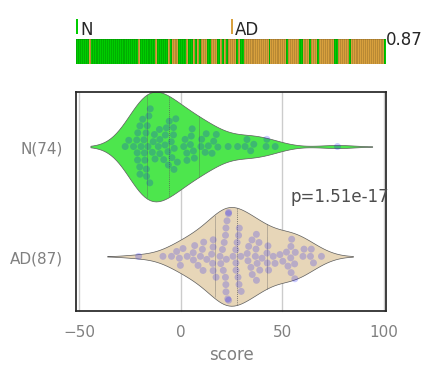

In [53]:
cls = bone.BIGraph.readClusters("results/ad-net-2-cls.txt")
high, low = bone.getFdrStats("results/fried-diff.txt", 1e-8, 1)
up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
ana = ADAnalysis()
ana.getFriedman2017()
l2 = set(cls['9705'][1])
l2 = [ana.h.getSimpleName(k) for k in l2]
l2 = [i for i in l2 if i != "---" and i != ""]
l1 = set(l2).intersection(high)
l2 = set(cls['79153'][1] + cls['3055'][1])
l2 = [ana.h.getSimpleName(k) for k in l2]
l2 = [i for i in l2 if i != "---" and i != ""]
l2 = set(l2).intersection(low)
print(len(l1), len(l2))
wt1, l1 = [-1, 0], [l1, l2]
#wt1, l1 = [1, -1], [up, down]
#l1[0] = set(l1[0]).difference(bone.getEntries("results/list-1.txt", 0))
l1 = bone.getEntries("results/list-1.txt", 0)
l2 = bone.getEntries("results/list-2.txt", 0)
wt1, l1 = [-3, 1], [l1, l2]
#ana.getFriedman2017()
#ana.getPatel2019(2, 0)
ana.getLiang2007()
fig = bone.processData(ana, l1, wt1, None, 1)

In [71]:
up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
ana = ADAnalysis()
ana.getFriedman2017()
def T1():
    for k in cls:
        l1 = [ana.h.getSimpleName(i) for i in cls[k][1]]
        l1 = [i for i in l1 if i != "---" and i != ""]
        print (k, ana.h.getSimpleName(k), cls[k][0], len(l1),
               len(set(high).intersection(l1)),
               len(set(low).intersection(l1)))
T1()

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
9066 SYT7 2292 2292 297 0
9705 ST18 183 183 0 2
5919 RARRES2 53 53 0 0
84316 NAA38 53 53 0 0
3055 HCK 37 37 0 0
57580 PREX1 23 23 0 0
63940 GPSM3 22 22 0 2
3913 LAMB2 17 17 0 4
7805 LAPTM5 14 14 0 0
4571 MT-TP 13 13 0 0
57106 NAT14 12 12 0 0
4536 MT-ND2 9 9 0 0
102465248 MIR6501 8 8 0 0
81611 ANP32E 8 8 0 0
3304 HSPA1B 7 7 0 0
3689 ITGB2 6 6 0 0
102725034 102725034 6 6 0 0
9448 MAP4K4 5 5 0 0
399949 C11orf88 5 5 0 0
9086 EIF1AY 5 5 0 0
64943 NT5DC2 4 4 0 0
4566 MT-TK 4 4 0 0
79037 PVRIG 3 3 0 0
100316904 SAP25 3 3 0 1
10049 DNAJB6 3 3 0 0
689 BTF3 3 3 0 0
10163 WASF2 3 3 0 1
8537 BCAS1 3 3 0 0
102725040 102725040 3 3 0 0
6662 SOX9 3 3 0 0
5970 RELA 3 3 0 2
51148 CERCAM 3 3 0 0
10749 KIF1C 3 3 0 1
400961 PAIP2B 3 3 0 0
102724400 102724400 3 3 0 0
2512 FTL 3 3 0 0
116173 CMTM5 3 3 0 0
9988 DMTF1 3 3 

101927199 101927199 1 1 0 0
51673 TPPP3 1 1 0 0
101927201 101927201 1 1 0 0
101927308 101927308 1 1 0 0
102723901 102723901 1 1 0 0
101927326 101927326 1 1 0 0
101929143 101929143 1 1 0 0
101927471 101927471 1 1 0 0
59342 SCPEP1 1 1 0 0
101927532 LINC01736 1 1 0 0
6275 S100A4 1 1 0 1
101927559 CEBPB-AS1 1 1 0 0
9021 SOCS3 1 1 0 0
101927578 101927578 1 1 0 0
387647 PTCHD3P1 1 1 0 0
101927614 101927614 1 1 0 0
101927681 101927681 1 1 0 0
51655 RASD1 1 1 0 0
101927688 SEPT4-AS1 1 1 0 0
101927695 101927695 1 1 0 0
3985 LIMK2 1 1 0 0
101927759 LOC101927759 1 1 0 0
101927820 101927820 1 1 0 0
113177 IZUMO4 1 1 0 0
101927838 101927838 1 1 0 0
101927841 101927841 1 1 0 0
101927848 101927848 1 1 0 1
84849 84849 1 1 0 0
101927850 101927850 1 1 0 0
101927862 CTB-178M22.2 1 1 0 0
101927894 101927894 1 1 0 0
101927910 101927910 1 1 0 0
101927931 LINC01480 1 1 0 0
101928054 101928054 1 1 0 0
101928058 LOC101928058 1 1 0 0
10768 AHCYL1 1 1 0 0
101928083 101928083 1 1 0 0
23046 KIF21B 1 1 0 0
10192819

9060 PAPSS2 1 1 0 0
30851 TAX1BP3 1 1 0 0
641654 HEPN1 1 1 0 0
3099 HK2 1 1 0 0
3105 HLA-A 1 1 0 0
5698 PSMB9 1 1 0 0
3107 HLA-C 1 1 0 0
4071 TM4SF1 1 1 0 0
3108 HLA-DMA 1 1 0 0
3109 HLA-DMB 1 1 0 0
3111 HLA-DOA 1 1 0 0
58475 MS4A7 1 1 0 0
3136 HLA-H 1 1 0 0
326624 RAB37 1 1 0 0
404037 HAPLN4 1 1 0 0
3280 HES1 1 1 0 0
3290 HSD11B1 1 1 0 0
3309 HSPA5 1 1 0 0
3305 HSPA1L 1 1 0 0
3310 HSPA6 1 1 0 0
3329 HSPD1 1 1 0 0
3326 HSP90AB1 1 1 0 0
3336 HSPE1 1 1 0 0
3383 ICAM1 1 1 0 0
338657 CCDC84 1 1 0 0
338773 TMEM119 1 1 0 0
3397 ID1 1 1 0 0
3399 ID3 1 1 0 0
633 BGN 1 1 0 0
340061 TMEM173 1 1 0 0
629 CFB 1 1 0 0
341 APOC1 1 1 0 0
7351 UCP2 1 1 0 0
3426 CFI 1 1 0 0
342865 VSTM2B 1 1 0 0
88 ACTN2 1 1 0 0
3429 IFI27 1 1 0 0
3430 IFI35 1 1 0 0
7205 TRIP6 1 1 0 0
347733 TUBB2B 1 1 0 0
387763 C11orf96 1 1 0 0
3491 CYR61 1 1 0 0
353322 ANKRD37 1 1 0 0
353511 PKD1P6 1 1 0 0
3553 IL1B 1 1 0 0
597 BCL2A1 1 1 0 0
358 AQP1 1 1 0 0
51285 RASL12 1 1 0 0
3606 IL18 1 1 0 0
361 AQP4 1 1 0 0
3623 INHA 1 1 0 0
3

In [35]:
l1 = list(ana.h.getIDs(" ".join(up)))
print(dr.loc[l1].describe())
" ".join(l1)
set(cls['9066'][1]).intersection(l1)

count    83.000000
mean      1.447665
std       0.866272
min       0.074774
25%       0.896581
50%       1.410035
75%       1.861368
max       4.116144
dtype: float64


{'2180', '23705', '308', '472', '51479', '56987', '79365'}

In [50]:
ana = ADAnalysis()
ana.getFriedman2017()
ana.h.saveDiff("results/fried-diff.txt", ana.state[0], ana.state[1])

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3


In [69]:
high, low = bone.getFdrStats("results/fried-diff.txt", 1e-8, 1)
len(high), len(low)

(579, 239)

In [4]:
def ADBubbleAnalysis(ana, desc=''):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    up = bone.getEntries("database/PMID29656362-Kim-up.txt", 0)
    down = bone.getEntries("database/PMID29656362-Kim-down.txt", 0)
    wt1, l1 = [1, -1], [up, down]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Kim', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [-3, 1], [bone.getEntries("results/list-1.txt", 0), \
                        bone.getEntries("results/list-2.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','BoNE', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

def ADBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), 
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    #labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax



Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
[736, 834]
[11, 12]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[1095, 1194]
[14, 16]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[1095, 1194]
[14, 16]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[1095, 1194]
[14, 16]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
60 [22, 38] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[1095, 1194]
[14, 16]
Liang 200

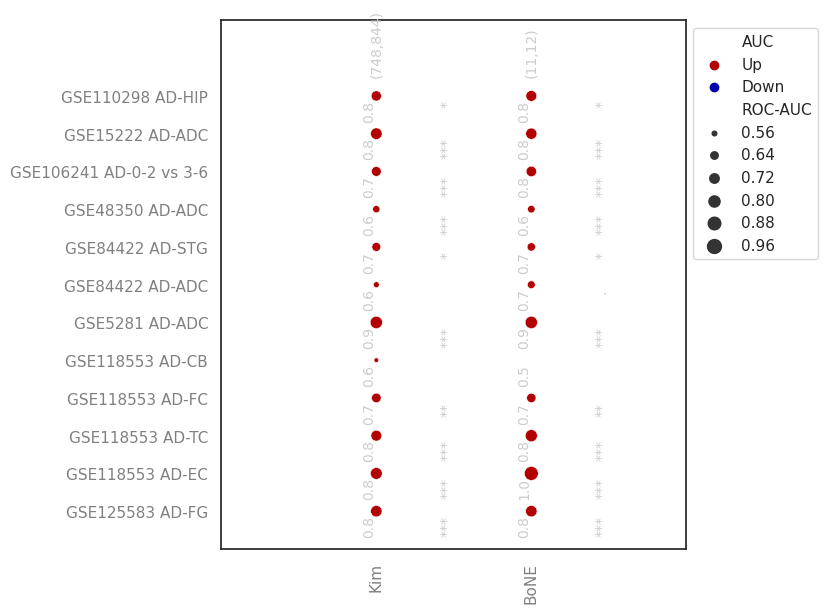

In [115]:
import bone
reload(bone)
ana = ADAnalysis()
res = []
ana.getFriedman2017()
res += [ADBubbleAnalysis(ana, 'AD-FG')]
ana.getPatel2019(2, 0)
res += [ADBubbleAnalysis(ana, 'AD-EC')]
ana.getPatel2019(2, 1)
res += [ADBubbleAnalysis(ana, 'AD-TC')]
ana.getPatel2019(2, 2)
res += [ADBubbleAnalysis(ana, 'AD-FC')]
ana.getPatel2019(2, 3)
res += [ADBubbleAnalysis(ana, 'AD-CB')]
ana.getLiang2007()
res += [ADBubbleAnalysis(ana, 'AD-ADC')]
ana.getWang2016(3)
res += [ADBubbleAnalysis(ana, 'AD-ADC')]
ana.getWang2016II(4, 10)
res += [ADBubbleAnalysis(ana, 'AD-STG')]
ana.getBerchtold2014()
res += [ADBubbleAnalysis(ana, 'AD-ADC')]
ana.getMarttinen2019(2)
res += [ADBubbleAnalysis(ana, 'AD-0-2 vs 3-6')]
ana.getWebster2009()
res += [ADBubbleAnalysis(ana, 'AD-ADC')]
ana.getBerchtold2019()
res += [ADBubbleAnalysis(ana, 'AD-HIP')]
pdf = getPDF("results/bubble-1.pdf")
df,ax = ADBubble(res)
pdf.savefig(transparent=True)
closePDF(pdf)

In [48]:
wt1, l1 = [-3, 1], [['SVOP','CACNG3','PCYOX1L','BEX1','TUBB3','NRN1',
  'GAP43','RGS4','PRMT8','NCALD','TUBB2A'],
 ['BGN','EHD2','FCGRT','NT5DC2','ITGB5','PDGFRB',
  'GPR4','LAMB2','FAM107A','GSDMD','NOTCH3','LAMA5']]
print(" ".join(l1[0]), "-", " ".join(l1[1]))
bone.reactome(" ".join(l1[1])).head(20)

SVOP CACNG3 PCYOX1L BEX1 TUBB3 NRN1 GAP43 RGS4 PRMT8 NCALD TUBB2A - BGN EHD2 FCGRT NT5DC2 ITGB5 PDGFRB GPR4 LAMB2 FAM107A GSDMD NOTCH3 LAMA5


,name,pValue,fdr
0,ECM proteoglycans,6.853731e-08,0.000007
1,Non-integrin membrane-ECM interactions,1.421620e-06,0.000074
2,Laminin interactions,1.074766e-05,0.000307
3,MET activates PTK2 signaling,1.181131e-05,0.000307
4,MET promotes cell motility,3.247405e-05,0.000649
5,Extracellular matrix organization,6.915124e-05,0.001176
6,Signaling by MET,2.338719e-04,0.003142
7,Pre-NOTCH Transcription and Translation,2.417238e-04,0.003142
8,Pre-NOTCH Expression and Processing,4.844515e-04,0.005329
9,Pyroptosis,1.009925e-03,0.010099


In [46]:
wt1, l1 = getADGeneSet('PMID32699331-Zakeri-deg')
ana = ADAnalysis()
ana.getSood2015I()
df = getDiff(ana, l1, ana.state[0], ana.state[2])

Sood 2015 1 ad blood (n = 329)
GSE63060 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD26
329 [104, 80, 145] GSE63060 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD26 AD26


### Training Datasets

In [120]:
ana = ADAnalysis()
res = []
ana.getFriedman2017()
res += [ADComparison(ana, desc=ana.h.getSource() + "-fusiform gyrus")]
ana.getPatel2019(2, 0)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Entorhinal_Cortex")]
ana.getWebster2009()
res += [ADComparison(ana, desc=ana.h.getSource() + "-cortical")]
df = pd.concat(res, sort=True)
df.to_csv("results/training-performance.txt", sep="\t")

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
[11, 12]
[736, 834]
[2]
[2]
[5]
[4]
[13]
[19, 16]
[24, 11]
[172, 421]
[12, 12]
[9]
[19]
[13, 67]
[3, 29]
[394, 398]
[339]
[400, 540]
[342]
[54, 46]
[30, 34]
[8, 4]
[3, 33]
[37]
[7, 10]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[14, 16]
[1095, 1194]
[7]
[3]
[14]
[4]
[31]
[29, 26]
[52, 21]
[313, 701]
[20, 20]
[14]
[32]
[23, 99]
[3, 39]
[573, 586]
[521]
[716, 896]
[518]
[81, 64]
[58, 63]
[11, 7]
[3, 76]
[61]
[17, 29]
Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
[11, 12]
[807, 897]
[5]
[3]
[4]
[2]
[14]
[16, 20]
[33, 11]
[186, 467]
[18, 18]
[7]

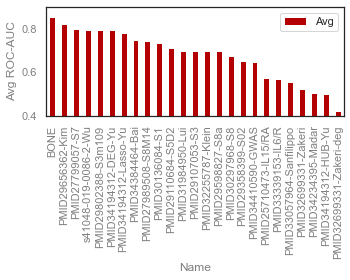

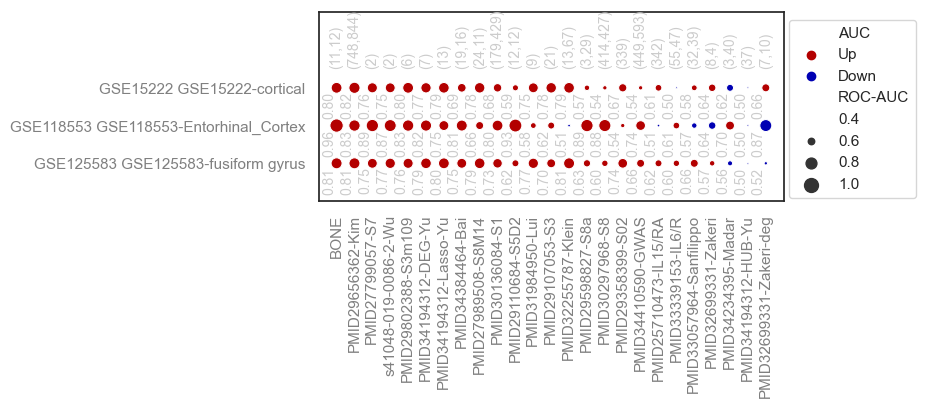

In [121]:
df = pd.read_csv("results/training-performance.txt", sep="\t", index_col=0)
res = np.array_split(df, 3, axis=0)
pdf = getPDF("results/training-performance.pdf")
df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='first')
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*24/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')
df,ax,fig = DP1([k.reindex(df1.index) for k in res])
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

### Validation Datasets

In [185]:
ana = ADAnalysis()
res = []
ana.getPatel2019(2, 1)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Frontal_Cortex")]
ana.getPatel2019(2, 2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Temporal_Cortex")]
ana.getLiang2007()
res += [ADComparison(ana, desc=ana.h.getSource() + "-all")]
ana.getLiang2007(2, 0)
res += [ADComparison(ana, desc=ana.h.getSource() + "-MTG")]
ana.getLiang2007(2, 1)
res += [ADComparison(ana, desc=ana.h.getSource() + "-HIP")]
ana.getLiang2007(2, 2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-SFG")]
ana.getLiang2007(2, 3)
res += [ADComparison(ana, desc=ana.h.getSource() + "-PVC")]
ana.getLiang2007(2, 5)
res += [ADComparison(ana, desc=ana.h.getSource() + "-EC")]
ana.getLiang2007(3)
res += [ADComparison(ana, desc=ana.h.getSource() + "-PCC")]
ana.getWang2016(3)
res += [ADComparison(ana, desc=ana.h.getSource() + "-all")]
ana.getWang2016(4, 0)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Amygdala")]
ana.getWang2016(4, 1)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Nucleus Accumbens")]
ana.getWang2016II(3)
res += [ADComparison(ana, desc=ana.h.getSource() + "-all")]
ahash = {'Inferior Temporal Gyrus':0, 'Parahippocampal Gyrus':1,
        'Middle Temporal Gyrus':2, 'Occipital Visual Cortex':3,
        'Prefrontal Cortex':4, 'Hippocampus':5, 'Caudate Nucleus':6,
        'Frontal Pole':7, 'Precentral Gyrus':8,
        'Posterior Cingulate Cortex':9, 'Superior Temporal Gyrus':10,
        'Superior Parietal Lobule':11, 'Temporal Pole':12,
        'Anterior Cingulate':13, 'Inferior Frontal Gyrus':14,
        'Dorsolateral Prefrontal Cortex':15, 'Putamen':16}
for k in ahash:
    ana.getWang2016II(4, ahash[k])
    res += [ADComparison(ana, desc=ana.h.getSource() + "-" + k)]
ana.getBerchtold2014()
res += [ADComparison(ana, desc=ana.h.getSource() + "-all")]
ana.getMarttinen2019()
res += [ADComparison(ana, desc=ana.h.getSource() + "-Braak 0 vs")]
ana.getMarttinen2019(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Braak 0-2 vs")]
ana.getLu2014()
res += [ADComparison(ana, desc=ana.h.getSource() + "-Ageing")]
ana.getLu2004()
res += [ADComparison(ana, desc=ana.h.getSource() + "-Ageing")]
ana.getBerchtold2019(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-Activity")]
ana.getSrinivasan2020()
res += [ADComparison(ana, desc=ana.h.getSource() + "-fusiform gyrus")]
ahash = {'myeloid':0, 'astrocyte':1, 'neuron':2, 'endothelial':3}
for k in ahash:
    ana.getSrinivasan2020II(2, ahash[k])
    res += [ADComparison(ana, desc=ana.h.getSource() + "-" + k)]
ana.getFriedman2018()
res += [ADComparison(ana, desc=ana.h.getSource() + "-fusiform gyrus")]
ana.getMiyashita2014(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-ADC")]
ana.getMcKay2019(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-ADC")]
ana.getLow2021(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-BA9")]
ana.getDunckley2006()
res += [ADComparison(ana, desc=ana.h.getSource() + "-EC")]
ana.getBlalock2011(2)
res += [ADComparison(ana, desc=ana.h.getSource() + "-HIP")]
df = pd.concat(res, sort=True)
df.to_csv("results/validation-performance.txt", sep="\t")

Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[14, 16]
[1095, 1194]
[7]
[3]
[14]
[4]
[31]
[29, 26]
[52, 21]
[313, 701]
[20, 20]
[14]
[32]
[23, 99]
[3, 39]
[573, 586]
[521]
[716, 896]
[518]
[81, 64]
[58, 63]
[11, 7]
[3, 76]
[61]
[17, 29]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[14, 16]
[1403, 1510]
[719]
[145, 94]
[81, 54]
[21, 12]
[12, 79]
[88]
[28, 40]
Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
23 [13, 10] GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2 AD2
[19, 24]
[1587, 1556]
[3]
[5]
[8]
[4]
[58]
[59, 41]
[41, 32]
[537, 851]
[25, 25]
[10]
[38]
[28, 174]
[8, 68]
[793, 909]
[763]
[1403, 1510]
[719]
[145, 94]
[81, 54]
[21, 12]
[12, 79]
[88]
[28, 40]
Liang 2007 Alz 

[18, 22]
[1668, 1616]
[3]
[4]
[8]
[4]
[51]
[55, 43]
[41, 33]
[508, 816]
[23, 23]
[18]
[45]
[33, 174]
[7, 68]
[798, 966]
[809]
[1366, 1384]
[756]
[144, 99]
[68, 46]
[18, 11]
[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10
32 [14, 18] GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10 AD10
[18, 22]
[1668, 1616]
[3]
[4]
[8]
[4]
[51]
[55, 43]
[41, 33]
[508, 816]
[23, 23]
[18]
[45]
[33, 174]
[7, 68]
[798, 966]
[809]
[1366, 1384]
[756]
[144, 99]
[68, 46]
[18, 11]
[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10
36 [16, 20] GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10 AD10
[18, 22]
[1668, 1616]
[3]
[4]
[8]
[4]
[51]
[55, 43]
[41, 33]
[508, 816]
[23, 23]
[18]
[45]
[33, 174]
[7, 68]
[798, 966]
[809]
[1366, 1384]
[756]
[144, 99]
[68, 46]
[18, 11]
[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http:/

[1845, 1785]
[3]
[4]
[10]
[4]
[57]
[61, 47]
[45, 34]
[566, 887]
[26, 26]
[19]
[47]
[37, 191]
[9, 72]
[884, 1085]
[883]
[1457, 1507]
[834]
[163, 110]
[78, 47]
[19, 12]
[12, 71]
[91]
[28, 43]


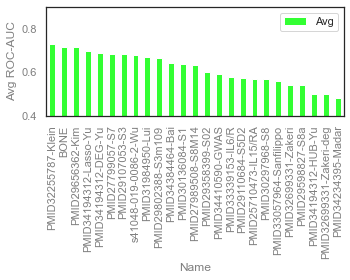

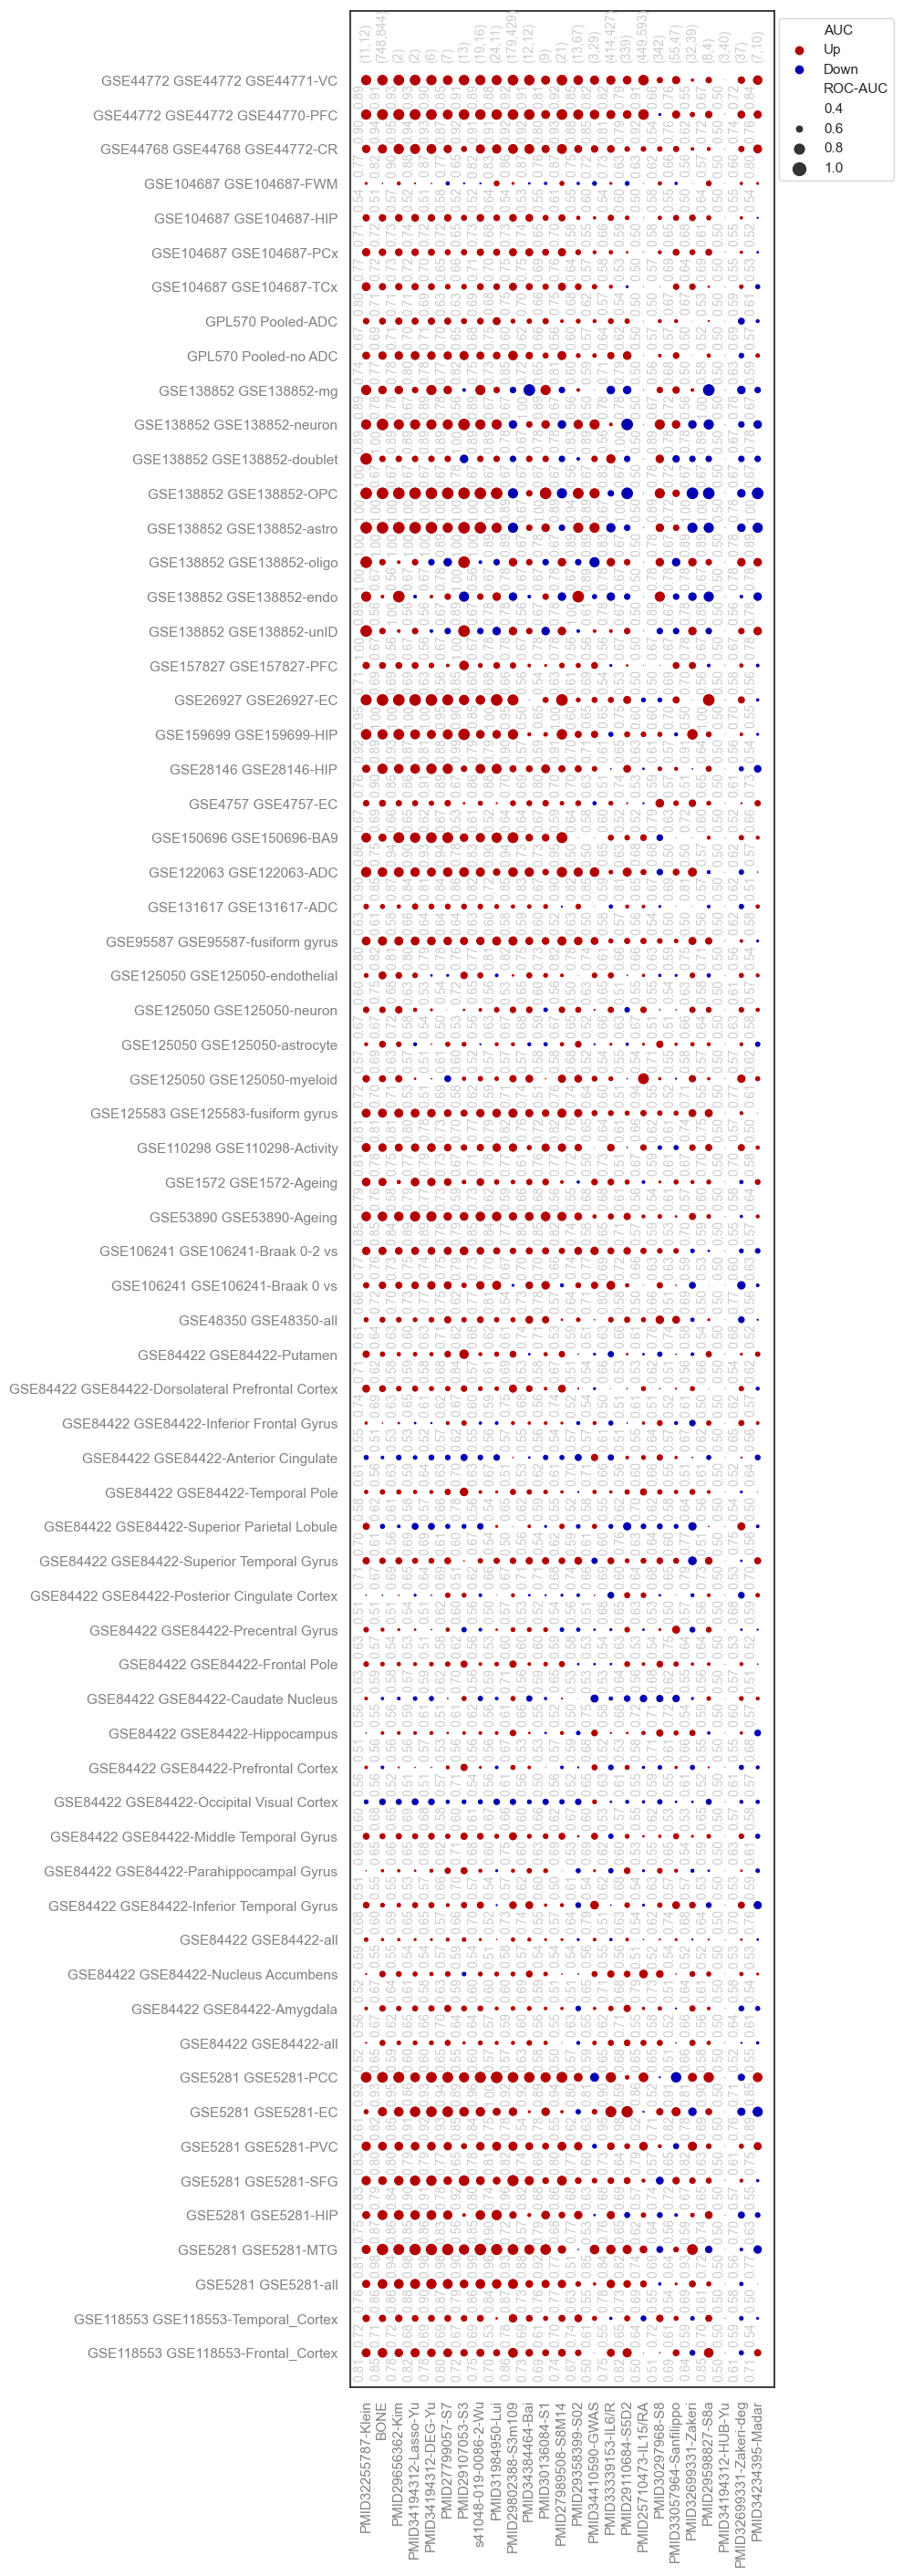

In [267]:
df1 = pd.read_csv("results/validation-performance.txt", sep="\t", index_col=0)
df2 = pd.read_csv("results/validation-performance-2.txt", sep="\t", index_col=0)
df = pd.concat([df1, df2])
res = np.array_split(df, df.shape[0]/25, axis=0)
pdf = getPDF("results/validation-performance.pdf")
df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='first')
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*24/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')
df,ax,fig = DP1([k.reindex(df1.index) for k in res])
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

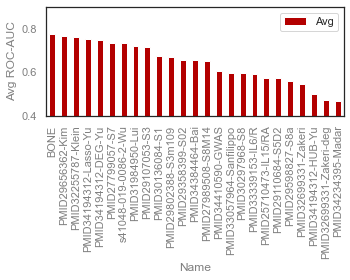

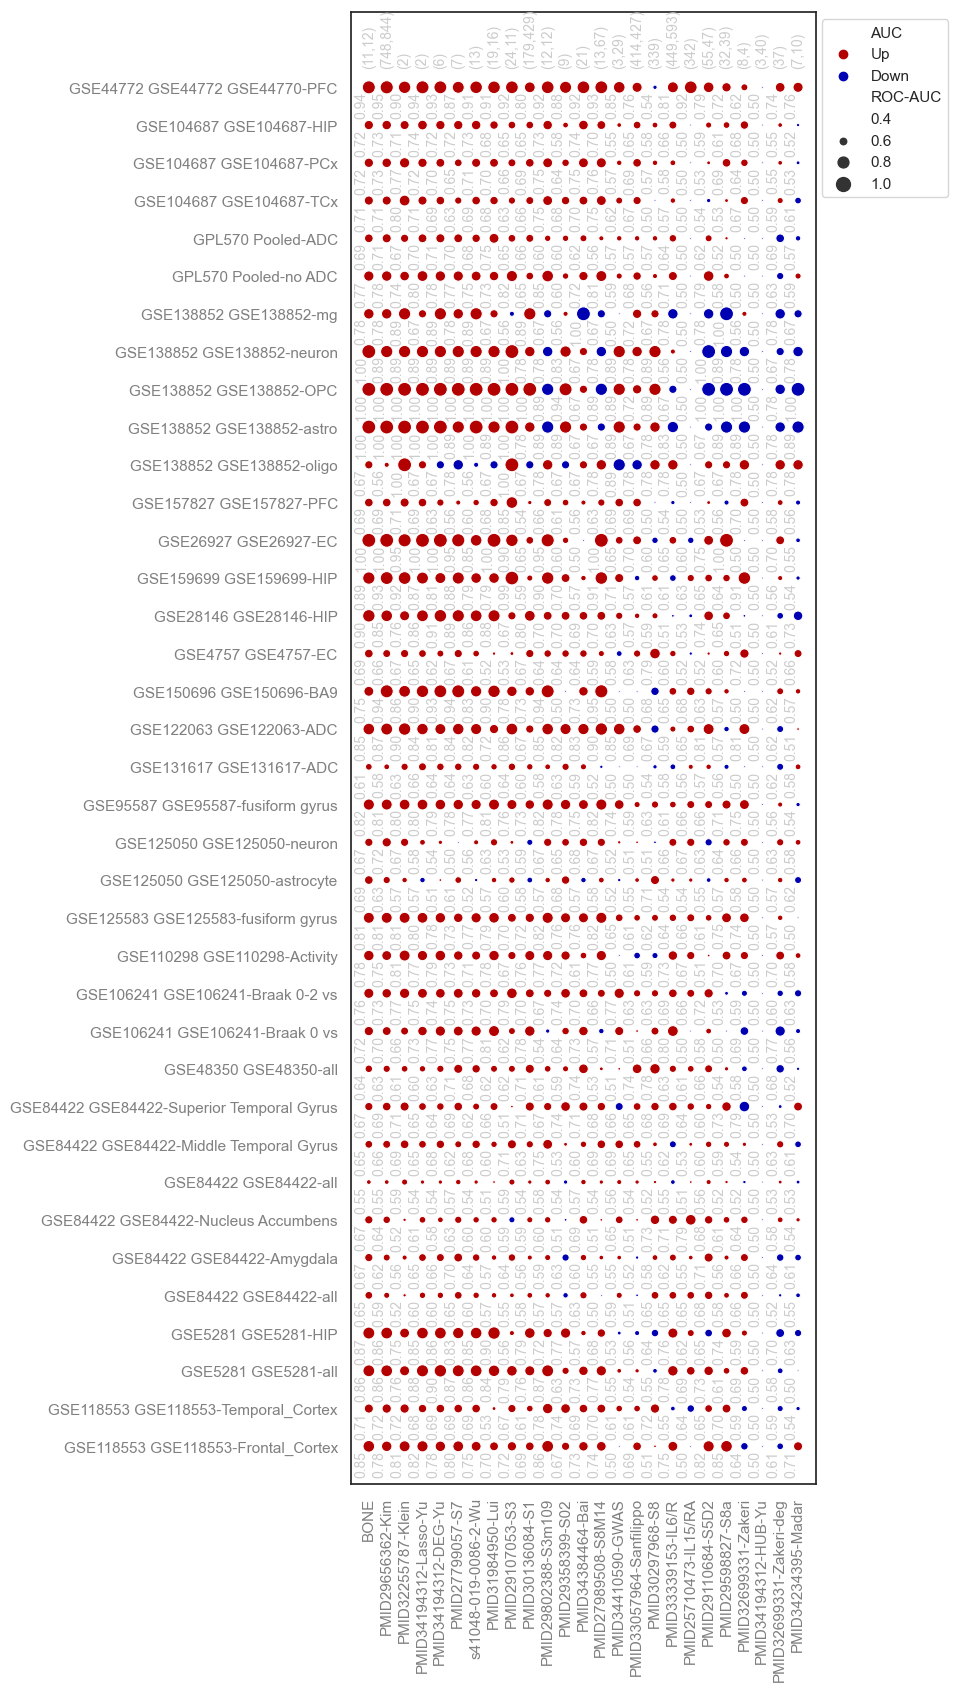

In [277]:
df1 = pd.read_csv("results/validation-performance.txt", sep="\t", index_col=0)
df2 = pd.read_csv("results/validation-performance-2.txt", sep="\t", index_col=0)
df = pd.concat([df1, df2])
l1 = ['GSE118553-Frontal_Cortex', 'GSE118553-Temporal_Cortex',
       'GSE5281-all', 'GSE5281-HIP', 'GSE84422-all',
       'GSE84422-Amygdala', 'GSE84422-Nucleus Accumbens',
       'GSE84422-Middle Temporal Gyrus', 'GSE84422-Superior Temporal Gyrus',
       'GSE48350-all', 'GSE106241-Braak 0 vs', 'GSE106241-Braak 0-2 vs',
       'GSE110298-Activity','GSE125583-fusiform gyrus',
       'GSE125050-astrocyte', 'GSE125050-neuron',
       'GSE95587-fusiform gyrus', 'GSE131617-ADC', 'GSE122063-ADC',
       'GSE150696-BA9', 'GSE4757-EC', 'GSE28146-HIP', 'GSE159699-HIP',
       'GSE26927-EC', 'GSE157827-PFC',
       'GSE138852-oligo', 'GSE138852-astro', 'GSE138852-OPC',
       'GSE138852-neuron', 'GSE138852-mg',
       'Pooled-no ADC', 'Pooled-ADC', 'GSE104687-TCx', 'GSE104687-PCx',
       'GSE104687-HIP', 'GSE44772 GSE44770-PFC']
df = df[df['Condition'].isin(l1)]
res = np.array_split(df, df.shape[0]/25, axis=0)
pdf = getPDF("results/validation-performance.pdf")
df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='first')
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*24/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')
df,ax,fig = DP1([k.reindex(df1.index) for k in res])
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [293]:
v1 = [k['ROC-AUC'][0] for k in res]
v2 = [k['ROC-AUC'][22] for k in res]
from scipy.stats import ttest_ind
t, p = ttest_ind(v1,v2, equal_var=False)
print(t,p)
res[0]['Signature']

3.35518902980539 0.0012711744194572922


0                        BONE
1            PMID29656362-Kim
2        PMID25710473-IL15/RA
3          PMID33339153-IL6/R
4           PMID34410590-GWAS
5     PMID33057964-Sanfilippo
6          PMID34234395-Madar
7            PMID34384464-Bai
8       PMID34194312-Lasso-Yu
9         PMID34194312-DEG-Yu
10        PMID34194312-HUB-Yu
11        PMID32699331-Zakeri
12    PMID32699331-Zakeri-deg
13       s41048-019-0086-2-Wu
14           PMID31984950-Lui
15         PMID32255787-Klein
16        PMID29802388-S3m109
17            PMID27799057-S7
18         PMID27989508-S8M14
19          PMID29110684-S5D2
20            PMID29107053-S3
21           PMID29358399-S02
22            PMID30136084-S1
23           PMID29598827-S8a
24            PMID30297968-S8
Name: Signature, dtype: object

Dong 2013 huvec GPR4 overexpress (n = 8)
GSE40060 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD32
8 [4, 4] GSE40060 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD32 AD32
[13, 15]
Avrampou 2019 pain (n = 16)
GSE138024 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD35
16 [8, 8] GSE138024 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD35 AD35
[11, 12]
Rodriguez 2021 ad (n = 680)
GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24
29 [23, 0, 3, 0, 3] GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24 AD24
[11, 12]
Rodriguez 2021 ad (n = 680)
GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24
29 [23, 0, 3, 0, 3] GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24 AD24
[11, 12]
Rodriguez 2021 ad (n = 680)
GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24
29 [23, 0, 3, 0, 3] GSE164788 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD24 AD24
[11, 12]


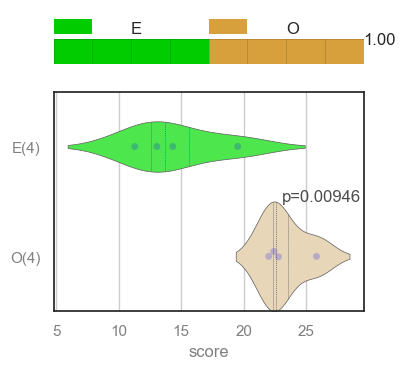

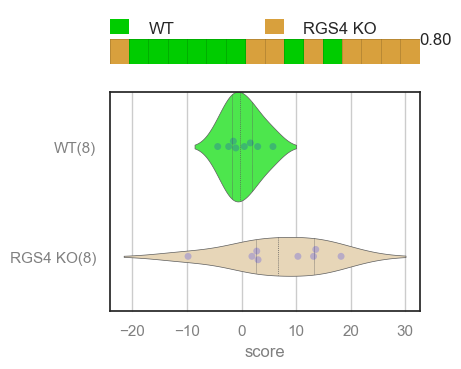

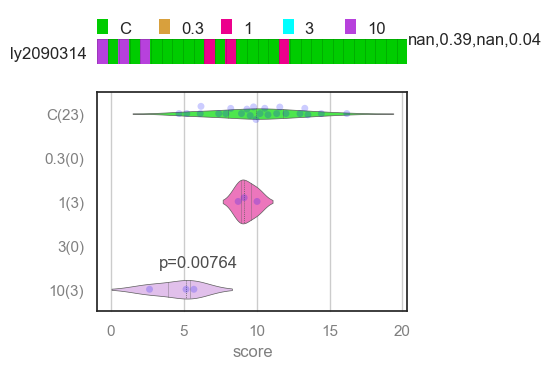

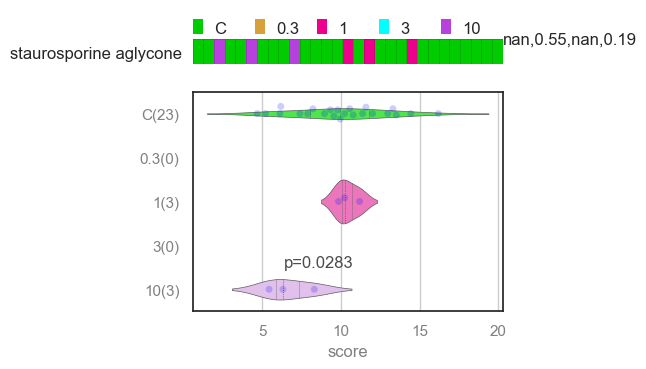

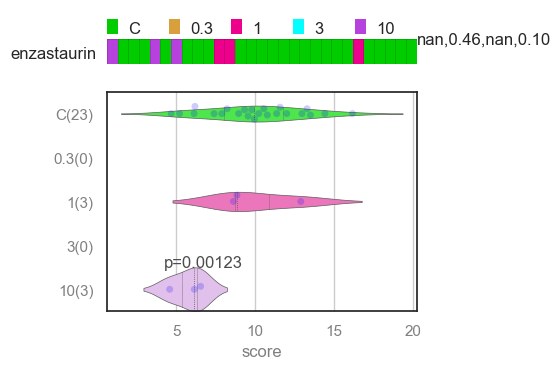

In [303]:
pdf = getPDF("results/validation-models.pdf")
wt1, l1 = getADGeneSet()
ana = ADAnalysis()
ana.getDong2013()
fig = bone.processData(ana, l1, wt1, None, 1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
ana.getAvrampou2019()
fig = bone.processData(ana, l1, wt1, None, 1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
ana.getRodriguez2021(2, 0, 'ly2090314')
fig = bone.processData(ana, l1, wt1, 'ly2090314', 1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
ana.getRodriguez2021(2, 0, 'staurosporine aglycone')
fig = bone.processData(ana, l1, wt1, 'staurosporine aglycone', 1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
ana.getRodriguez2021(2, 0, 'enzastaurin')
fig = bone.processData(ana, l1, wt1, 'enzastaurin', 1)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

In [334]:
cfile="/booleanfs2/sahoo/Data/Bladder/test/BLC-211516-Table-1.txt"
df = pd.read_csv(cfile, sep="\t", skiprows=1)
time = list(df['Follow-up'])
ahash = {'alive':0, 'dead':1}
status = [ahash[k] for k in df['Survival state']]
high = [k for k in df.index if df['CDK6 expression'][k] >= 250]
low = [k for k in df.index if df['CDK6 expression'][k] < 250]
high = [k for k in df.index if df['BLCA grading'][k] == 'High']
low = [k for k in df.index if df['BLCA grading'][k] == 'Low']
pG = [["High", "red", high], ["Low", "green", low]]
pG = []
for k in hu.uniq(df['AJCC staging']):
    l1 = [i for i in df.index if df['AJCC staging'][i] == k]
    pG += [[k, "red", l1]]
pG[0][1] = "green"
pG[1][1] = "blue"
pG[2][1] = "orange"
pG[3][1] = "brown"
#hu.survival(time, status, pG)

In [3]:
def getNativio2020(self, tn=1, ta=0, tb=0):
    self.prepareData("ad59", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c title2')
    atypes = ['Y', 'O', "AD"]
    ahash = {'AD [RNA-seq]':2, 'Old [RNA-seq]':1, 'Young [RNA-seq]':0}
    if (tn == 2):
        atypes = ['O', "AD"]
        ahash = {'AD [RNA-seq]':1, 'Old [RNA-seq]':0}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getNativio2020 = getNativio2020
def getPascal2011(self, tn=1, ta=0, tb=0):
    self.prepareData("ad63", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype = ana.h.getSurvName('c gender (ch1)')
    ahash = {'F':0, 'M':1}
    gval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c disease (ch1)')
    ahash = {"Alzheimer's disease":0, 'Amyotrophic lateral sclerosis':1,
             "Huntington's disease":2, 'Multiple sclerosis':3,
             "Parkinson's disease":4, 'Schizophrenia':5}
    tval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c disease2 (ch1)')
    atypes = ['C', 'D']
    ahash = {'AD_Control':0, 'AD_Disease':1, 'ALS_Control':0, 'ALS_Disease':1,
             'HD_Control':0, 'HD_Disease':1, 'MS_Control':0, 'MS_Disease':1,
             'PD_Control':0, 'PD_Disease':1, 'SCHIZ_Control':0, 'SCHIZ_Disease':1}
    if (tn == 2):
        atype = [atype[i] if tval[i] == ta and gval[i] == tb
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getPascal2011 = getPascal2011
def getNancy2020(self, tn=1, ta=0, tb=0):
    self.prepareData("ad69", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c diagnosis (ch1)')
    atypes = ['C', "AD"]
    ahash = {'AD':1, 'healthy control':0}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getNancy2020 = getNancy2020
def getChew2019(self, tn=1, ta=0, tb=0):
    self.prepareData("ad68.3", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype=self.h.getSurvName('c CellType')
    ahash = {'unID':0, 'endo':1, 'oligo':2, 'astro':3, 'OPC':4, 'doublet':5,
             'neuron':6, 'mg':7}
    tval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c disease state (ch1)')
    atypes = ['C', "AD"]
    ahash = {'control':0, 'AD':1}
    if (tn == 2):
        atype = [atype[i] if tval[i] == ta
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getChew2019 = getChew2019
def getSwarup2021(self, tn=1, ta=0, tb=0):
    self.prepareData("ad54", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype=self.h.getSurvName('c diagnosis (ch1)')
    atypes = ['C', "AD"]
    ahash = {'Control':0, 'AD':1}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getSwarup2021 = getSwarup2021
def getADPooledDyn(self, tn=1, ta=0, tb=0):
    self.prepareData("AD7")
    atype = self.h.getSurvName('c AD specific');
    ahash = {'0':0, '1':1}
    tval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c Disease State');
    atypes = ['N', 'AD']
    ahash = {'Normal':0, "Alzheimer's Disease":1, 'normal':0,
            'definite AD':0, 'Control':0}
    if (tn == 2):
        atype = [atype[i] if tval[i] == ta
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getADPooledDyn = getADPooledDyn
def getMiller2017(self, tn=1, ta=0, tb=0):
    self.prepareData("ad6", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c hemisphere (ch1)');
    ahash = {'left':0, 'right':1}
    sval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c brain region (ch1)');
    ahash = {'TCx':0, 'PCx':1, 'HIP':2, 'FWM':3}
    tval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c new_nincds_arda_diagnosis');
    atypes = ['No Dementia', "AD" ]
    ahash = {'No Dementia':0, "Possible Alzheimer'S Disease":1,
            "Probable Alzheimer'S Disease":1}
    if (tn == 2):
        atype = [atype[i] if tval[i] == ta
                 else None for i in range(len(atype))]
    if (tn == 3):
        atype = [atype[i] if tval[i] == ta and sval[i] == tb
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getMiller2017 = getMiller2017
def getYang2020(self, tn=1, ta=0, tb=0):
    self.prepareData("ad103", "/Users/sataheri/public_html/Hegemon/explore.conf")
    atype = self.h.getSurvName('c brain region (ch1)');
    ahash = {'Superior frontal cortex':0, 'Hippocampus':1}
    tval = [ahash[i] if i in ahash else None for i in atype]
    atype = self.h.getSurvName('c disease (ch1)');
    atypes = [  'Control','AD']
    ahash = {'Control':0, "AD":1}
    if (tn == 2):
        atype = [atype[i] if tval[i] == ta
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getYang2020 = getYang2020
def getZhang2013(self, dbid="MAC39.1"):
    self.prepareData(dbid)
    atype = self.h.getSurvName("c disease")
    atypes = ['A', 'N']
    ahash = {}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getZhang2013 = getZhang2013
def getCuadradoTejedor2015(self, dbid="AD48"):
    self.prepareData(dbid)
    atype = self.h.getSurvName("c sample group")
    atypes = ['SL', 'SH', 'T', 'ST', 'CM']
    ahash = {'chronic treatment with Tadalafil':2,
     'chronic treatment with saline':0,
     'chronic treatment with SAHA and Tadalafil':3,
     'chronic treatment with SAHA':1,
     'chronic treatment with CM-414':4}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getCuadradoTejedor2015 = getCuadradoTejedor2015
def getTaubes2021(self, dbid="AD49"):
    self.prepareData(dbid)
    atype = self.h.getSurvName("c treatment")
    atypes = ['U', 'D', 'B']
    ahash = {'Treated with 10 uM Bumetanide':2,
             'Untreated':0, 'Treated with DMSO':1}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getTaubes2021 = getTaubes2021
def getTaubes2021mmI(self, dbid="AD49.2"):
    self.prepareData(dbid)
    atype = self.h.getSurvName("c treatment")
    atypes = ['U', 'B']
    ahash = {'Bumetanide treated':1, 'Vehicle treated':0}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getTaubes2021mmI = getTaubes2021mmI
def getTaubes2021mmII(self, dbid="AD49.3"):
    self.prepareData(dbid)
    atype = self.h.getSurvName("c treatment")
    atypes = ['U', 'B']
    ahash = {'Bumetanide treated':1, 'Vehicle treated':0}
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getTaubes2021mmII = getTaubes2021mmII
def getCherqui2021(self, tn=1, ta = 0):
    self.prepareData("AD46")
    atype = self.h.getSurvName('c Tissue')
    atypes = ['C', 'H']
    ahash = {'Cortex':0, 'Hippocampus':1}
    aval = [ahash[i] if i in ahash else None for i in atype]
    if tn == 2:
        atype = self.h.getSurvName('c GENOTYPE')
        atypes = ['C', 'AD', 'T']
        ahash = {'5xFAD/WT-HSPCs':2, '5xFAD/5xFAD-HSPCs':1,
                 '5xFAD':1, 'WT':0, 'WT/WT-HSPCs':0}
    if tn == 3:
        atype = self.h.getSurvName('c GENOTYPE')
        atypes = ['C', 'CT', 'T', 'D', 'M']
        ahash = {'5xFAD/WT-HSPCs':2, '5xFAD/5xFAD-HSPCs':4,
                 '5xFAD':3, 'WT':0, 'WT/WT-HSPCs':1}
        atype = [atype[i] if aval[i] == ta
                 else None for i in range(len(atype))]
    self.initData(atype, atypes, ahash)
    return
ADAnalysis.getCherqui2021 = getCherqui2021

In [6]:
#atype = ana.h.getSurvName('c drug_treatment')
#atype1 = ana.h.getSurvName('c drug_concentration_um')
#[' '.join([ana.headers[i], atype[i], atype1[i]]) for i in ana.i1]
atype = ana.h.getSurvName('c Title')
[' '.join([ana.headers[i], atype[i]]) for i in ana.i1]
#ana.h.survhdrs

["ax0113 ax0113 Human iPSC-Derived Neural Stem Cells - Alzheimer's Disease Patient (PSEN1 M146L)",
 'ax0015 ax0015 Neural Stem Cells (Male)',
 'ax0015-1 ax0015 Neural Stem Cells (Male).1',
 'ax0019-1 ax0019 Neural Stem Cells (Female).1',
 'ax0019 ax0019 Neural Stem Cells (Female)',
 'ax0211 ax0211 Neural Stem Cells HD CAG50',
 'ax0211-1 ax0211 Neural Stem Cells HD CAG50.1',
 "ax0114 ax0114 Human iPSC-Derived Neural Stem Cells - Alzheimer's Disease Patient (PSEN1 A246E)",
 "ax0111 ax0111 Human iPSC-Derived Neural Stem Cells - Alzheimer's Disease Patient (APOE4 HOM)",
 'ax0016 ax0016 Neural Stem Cells (Female)',
 'ax0018 ax0018 Neural Stem Cells (Male)',
 'ax0018-1 ax0018 Neural Stem Cells (Male).1',
 "ax0112 ax0112 Human iPSC-Derived Neural Stem Cells - Alzheimer's Disease Patient (PSEN1 L286V)"]

Cherqui 2021 ad mm (n = 24)
Cherqui http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD46
12 [2, 1, 3, 3, 3] Cherqui http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD46 AD46
[1]


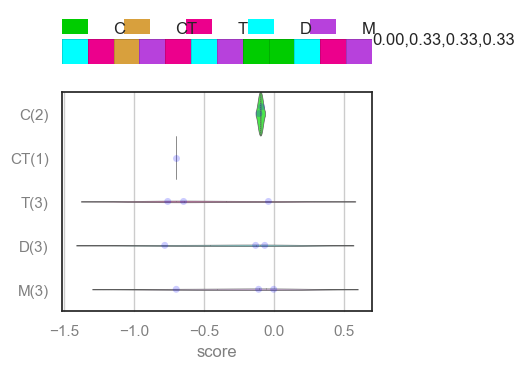

In [40]:
import bone
reload(bone)
#wt1, l1 = getADGeneSet()
ana = ADAnalysis()
#ana.getFriedman2017()
#ana.getPatel2019(2, 0)
#ana.getLiang2007(2, 5)
#ana.getWang2016(3)
#ana.getWang2016(4, 0)
#ana.getWang2016II(4, 10)
#ana.getBerchtold2014()
#ana.getMarttinen2019(2)
#ana.getWebster2009()
#ana.getLu2014()
#ana.getLu2004()
#ana.getBerchtold2019(2)
#ana.getSrinivasan2020()
#ana.getSrinivasan2020II(2, 0)
#ana.getFriedman2018()
#ana.getRodriguez2021(2, 0, 'ly2090314')
#ana.getRodriguez2021(2, 0, 'staurosporine aglycone')
#ana.getRodriguez2021(2, 0, 'enzastaurin')
#ana.getRodriguez2021()
#ana.getNiculescu2020(3)
#ana.getSood2015I()
#ana.getSood2015II()
#ana.getMiyashita2014(2)
#ana.getSamsudin2016()
#ana.getMcKay2019(2)
#ana.getLow2021(2)
#ana.getDong2013()
#ana.getHurley2012()
#ana.getPatella2020()
#ana.getAvrampou2019()
#ana.getOlmosSerrano2016(2, 3)
#ana.getWilliams2009()
#ana.getAxol2021(2)
#ana.getDunckley2006()
#ana.getBlalock2011(2)
#ana.getNativio2020(2)
#ana.getPascal2011(2, 0, 0)
#ana.getChew2019(2, 3)
#ana.getSwarup2021()
#ana.getADPooledDyn(2, 1)
#ana.getMiller2017(2, 0)
#ana.getYang2020(2, 1)
#ana.getZhang2013("MAC39.3")
#ana.getTaubes2021()
#wt1, l1 = getADGeneSet(1)
#ana.convertMm(l1, [])
#l1 = ana.gene_groups
wt1, l1 = [1], [['Tyrobp', 'Fcer1g', 'Cd68', 'Itgam', 'Cd14', 'Emr1', 'Cst7', 'Cd74', 'Clec7a']]
wt1, l1 = [1], [['App']]
#ana.getQian2020()
#ana.getCuadradoTejedor2015()
#ana.getTaubes2021mmI()
#ana.getTaubes2021mmII()
ana.getCherqui2021(3, 0) # Cortex
#ana.getCherqui2021(3, 1) # Hip
fig = bone.processData(ana, l1, wt1, None, 1)
#ADComparison(ana, desc='test')

<a id="test_1"></a>
### Test
[Diet Analysis](#TOC) <br/>
[BoNE](#bone)

In [34]:
reload(hu)
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
#db = hu.Database("/Users/mahdi/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/sataheri/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/mgosztyl/public_html/Hegemon/explore.conf")
dbid = "AD49.2"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
title = h.getTitle()
print (title)
atype = h.getSurvName('c treatment')
#atype = [re.sub(".* ", "", str(k)) for k in atype]
#atype = [str(k).split(" ")[2] if len(str(k).split(" ")) > 2 else k for k in atype]
hu.uniq(atype)
#h.survhdrs

Taubes 2021 ad mm scblk 1 (GSE182762 GSE182765; n = 6)


[9, 'c treatment', 'Bumetanide treated', 'Vehicle treated']